<a href="https://colab.research.google.com/github/kimjaehwankimjaehwan/Medical_statistics/blob/main/lung_cancer_prediction_ML_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.3 MB/s eta 0:00:00


In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import roc_curve, roc_auc_score
from imblearn.combine import SMOTEENN

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns

## FEATURES:

## Gender: M(male), F(female)

## Age: Age of the patient

## Smoking: YES=2 , NO=1

## Yellow fingers: YES=2 , NO=1

## Anxiety: YES=2 , NO=1

## Peer_pressure: YES=2 , NO=1

## Chronic Disease: YES=2 , NO=1

## Fatigue: YES=2 , NO=1

## Allergy: YES=2 , NO=1

## Wheezing: YES=2 , NO=1

## Alcohol: YES=2 , NO=1

## Coughing: YES=2 , NO=1

## Shortness of Breath: YES=2 , NO=1

## Swallowing Difficulty: YES=2 , NO=1

## Chest pain: YES=2 , NO=1

## Lung Cancer: YES , NO  (target)

### Load the Data

In [6]:
data = pd.read_csv('/content/drive/MyDrive/medical/survey lung cancer.csv')

### Show general information about data

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

### Show number of rows and columns

In [8]:
data.shape

(309, 16)

### Show first 5 rows

In [9]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


### Show column names

In [10]:
data.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

### some columns contain extra spaces ('FATIGUE ', 'ALLERGY ')

## Data Cleaning and Data Manipulation

### Rename some columns

In [11]:
data.rename(columns = {'YELLOW_FINGERS': 'YELLOW FINGERS', 'PEER_PRESSURE': 'PEER PRESSURE',
            'LUNG_CANCER': 'LUNG CANCER', 'FATIGUE ': 'FATIGUE', 'ALLERGY ': 'ALLERGY'}, inplace = True)

### Replace M with Male, F with Female

### Replace 2 with Yes, 1 with No

### Convert YES and NO values to Capital in 'LUNG CANCER' (target) column

In [12]:
data['GENDER'] = data['GENDER'].map({'M': 'Male', 'F': 'Female'})

data['SMOKING'] = data['SMOKING'].map({2: 'Yes', 1: 'No'})
data['YELLOW FINGERS'] = data['YELLOW FINGERS'].map({2: 'Yes', 1: 'No'})
data['ANXIETY'] = data['ANXIETY'].map({2: 'Yes', 1: 'No'})
data['PEER PRESSURE'] = data['PEER PRESSURE'].map({2: 'Yes', 1: 'No'})
data['CHRONIC DISEASE'] = data['CHRONIC DISEASE'].map({2: 'Yes', 1: 'No'})
data['FATIGUE'] = data['FATIGUE'].map({2: 'Yes', 1: 'No'})
data['ALLERGY'] = data['ALLERGY'].map({2: 'Yes', 1: 'No'})
data['WHEEZING'] = data['WHEEZING'].map({2: 'Yes', 1: 'No'})
data['ALCOHOL CONSUMING'] = data['ALCOHOL CONSUMING'].map({2: 'Yes', 1: 'No'})
data['COUGHING'] = data['COUGHING'].map({2: 'Yes', 1: 'No'})
data['SHORTNESS OF BREATH'] = data['SHORTNESS OF BREATH'].map({2: 'Yes', 1: 'No'})
data['SWALLOWING DIFFICULTY'] = data['SWALLOWING DIFFICULTY'].map({2: 'Yes', 1: 'No'})
data['CHEST PAIN'] = data['CHEST PAIN'].map({2: 'Yes', 1: 'No'})

data['LUNG CANCER'] = data['LUNG CANCER'].str.capitalize()

### Show first 5 rows again

In [13]:
data.head()

,GENDER,AGE,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,No
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No


### Checking for Missing Values

In [14]:
data.isna().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW FINGERS,0
ANXIETY,0
PEER PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


### Total of Missing Values

In [15]:
data.isna().sum().sum()

0

### Checking for Duplicates

In [16]:
data.duplicated().sum()

33

### Show Duplicates

In [17]:
data.loc[data.duplicated()]

,GENDER,AGE,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG CANCER
99,Male,56,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
100,Male,58,Yes,No,No,No,No,No,Yes,Yes,Yes,Yes,No,No,No,Yes
117,Female,51,Yes,Yes,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,No,Yes
199,Female,55,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes
212,Male,58,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
223,Male,63,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,No,Yes
256,Male,60,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
275,Male,64,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,No,No,Yes,Yes,Yes
284,Male,58,Yes,Yes,Yes,Yes,Yes,No,No,No,Yes,No,No,Yes,Yes,Yes
285,Female,58,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,Yes,No,Yes


### Drop Duplicates

In [18]:
data.drop_duplicates(inplace = True)

data.duplicated().sum()

0

### Reset Index of data

In [19]:
data = data.reset_index(drop = True)

### Show new shape of data

In [20]:
data.shape

(276, 16)

## Show Numeric and Categorical Features

In [21]:
data.select_dtypes(include = 'number').columns

Index(['AGE'], dtype='object')

In [22]:
len(data.select_dtypes(include = 'number').columns)

1

In [23]:
data.select_dtypes(include = 'object').columns

Index(['GENDER', 'SMOKING', 'YELLOW FINGERS', 'ANXIETY', 'PEER PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG CANCER'],
      dtype='object')

In [24]:
len(data.select_dtypes(include = 'object').columns)

15

### Show Descriptive Statistics for Numeric Feature('Age')

In [25]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,276.0,62.90942,8.379355,21.0,57.75,62.5,69.0,87.0


## Dealing with Outliers

### No need to remove outliers because the data set is very small

## 'Age' Distribution

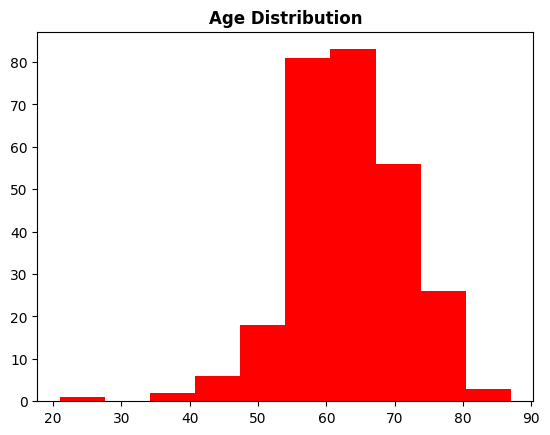

In [26]:
plt.hist(x = data['AGE'], color = 'red')
plt.title('Age Distribution', weight = 'bold')
plt.show()

## Visualizing of Categorical Features

In [27]:
data_categorical = data.drop(columns = ['AGE', 'LUNG CANCER'])

In [28]:
data_categorical.columns

Index(['GENDER', 'SMOKING', 'YELLOW FINGERS', 'ANXIETY', 'PEER PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

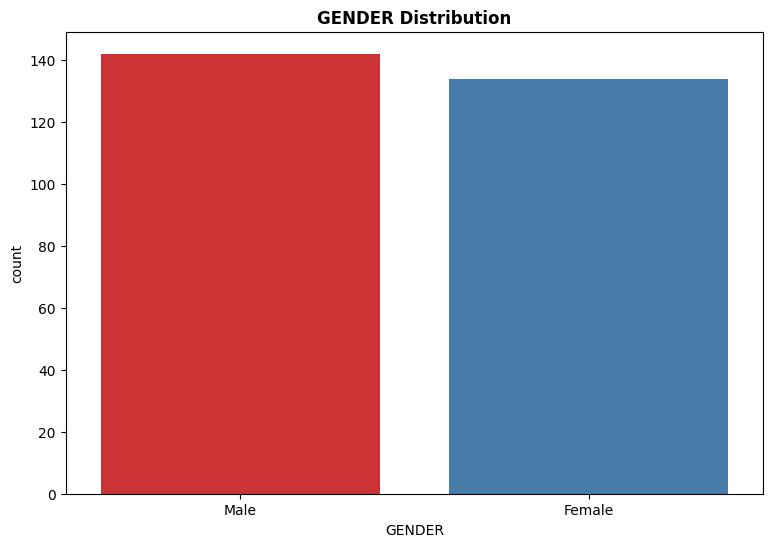

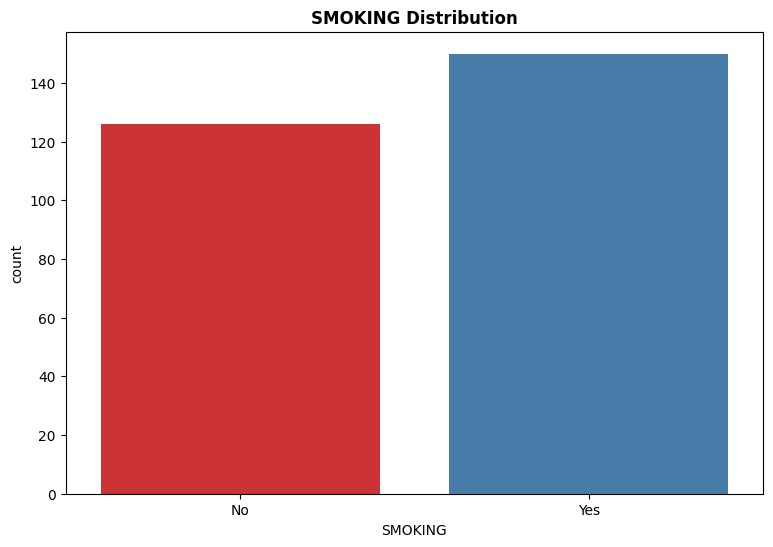

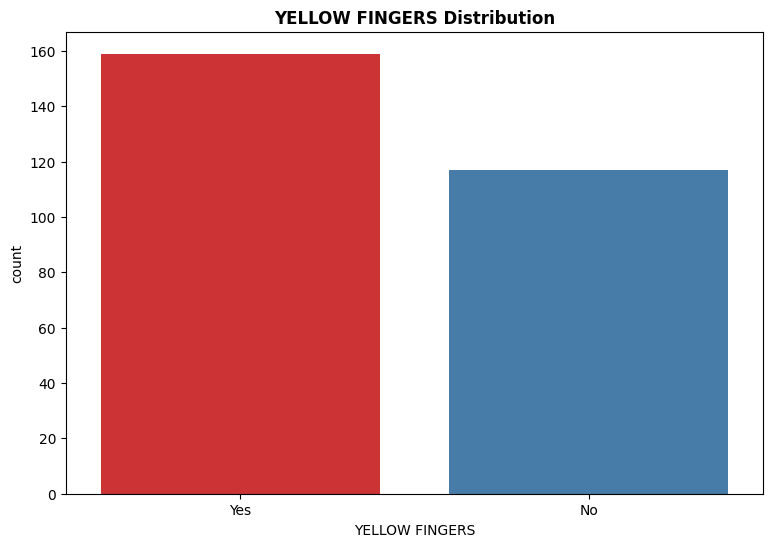

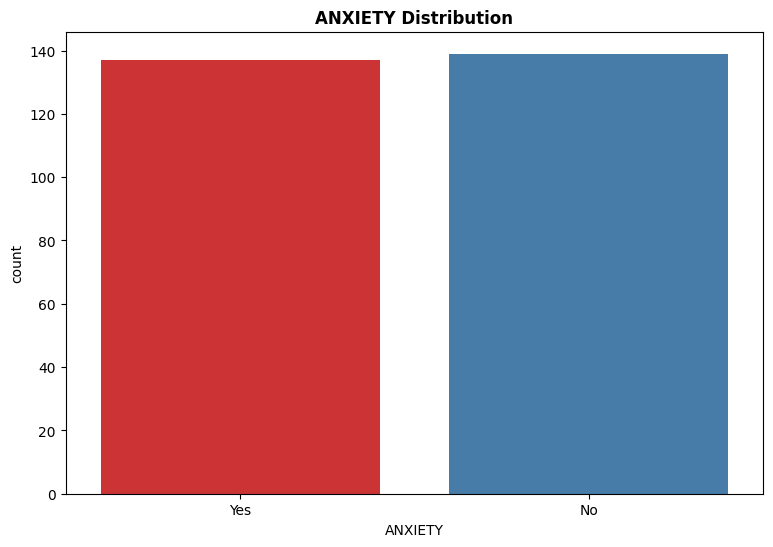

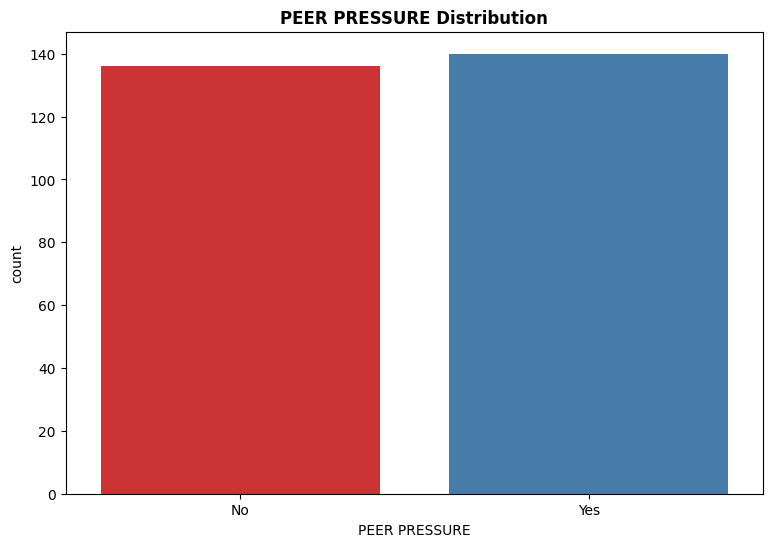

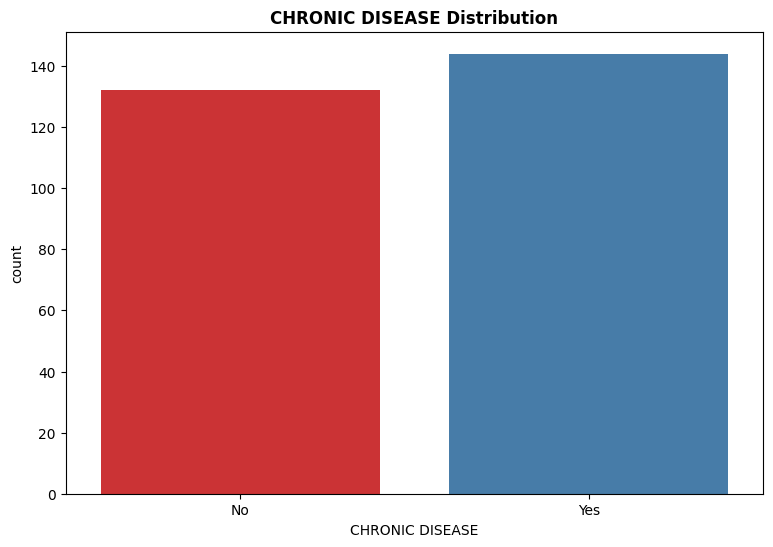

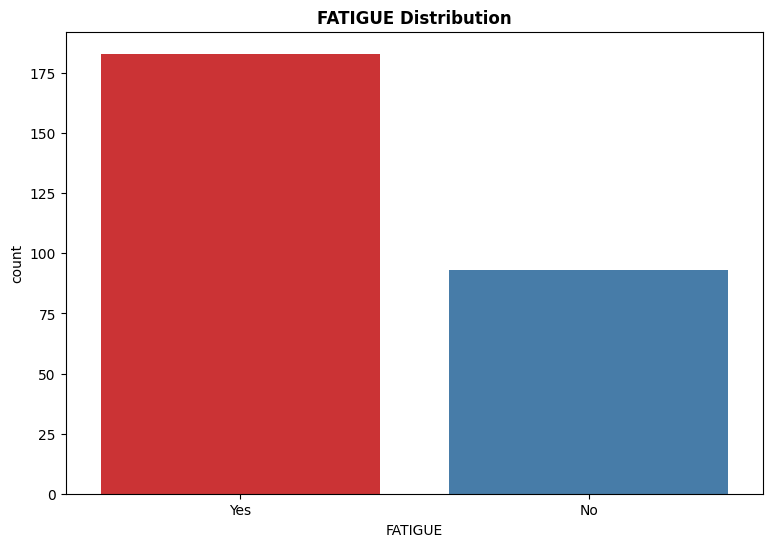

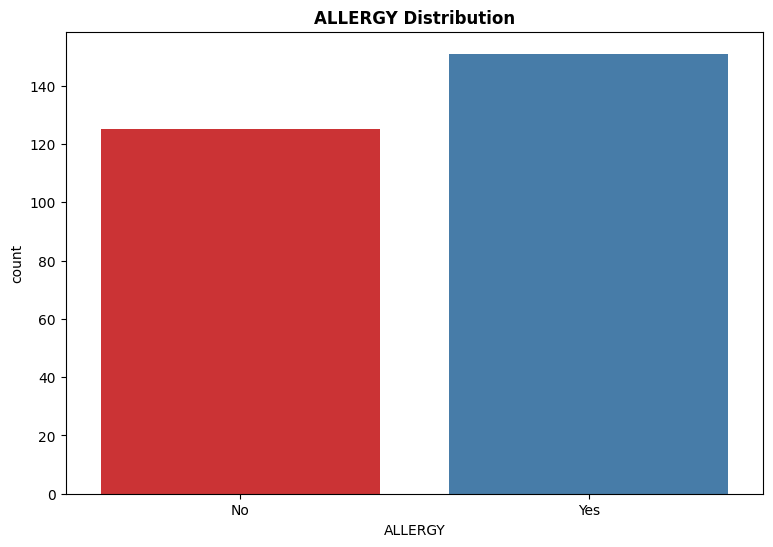

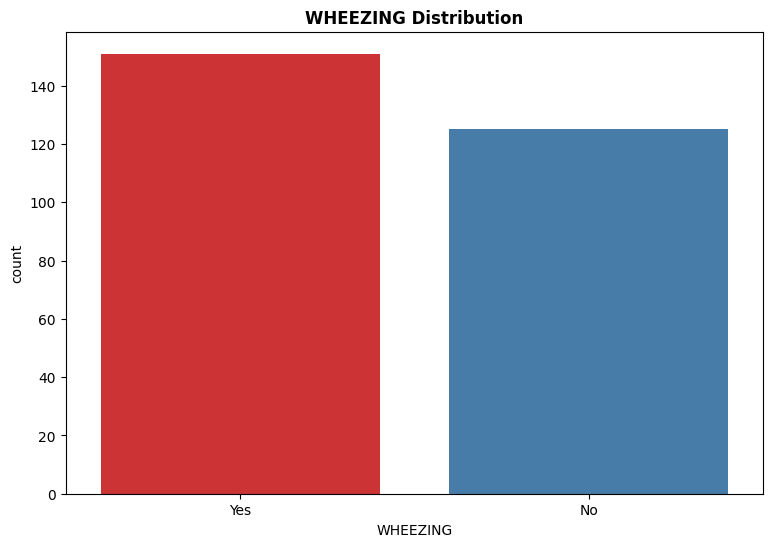

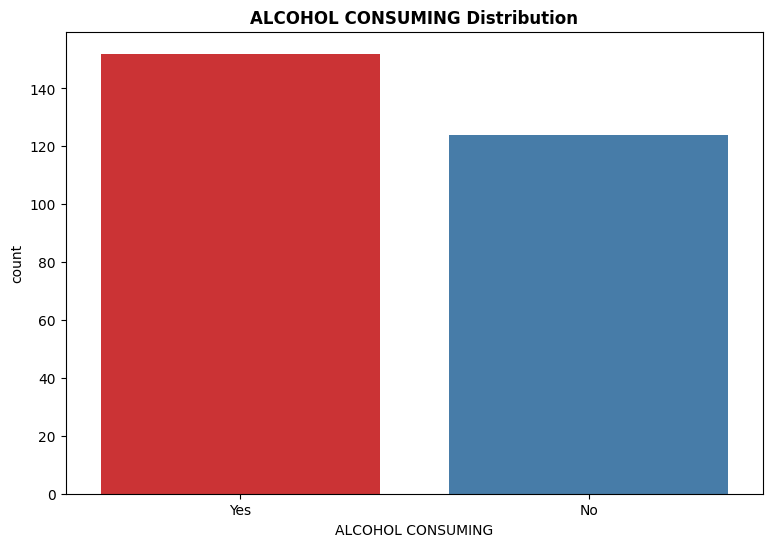

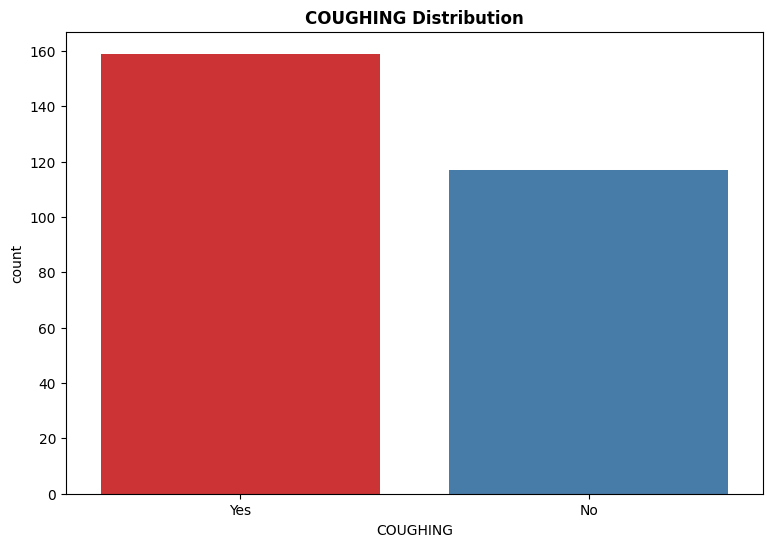

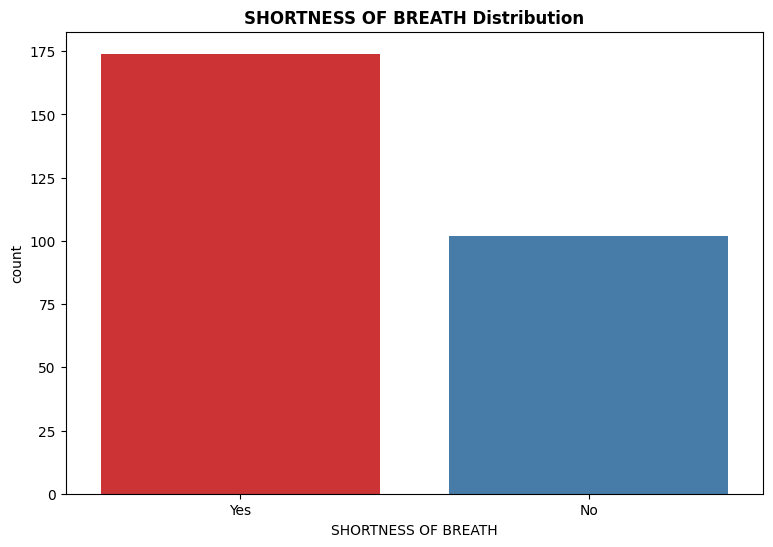

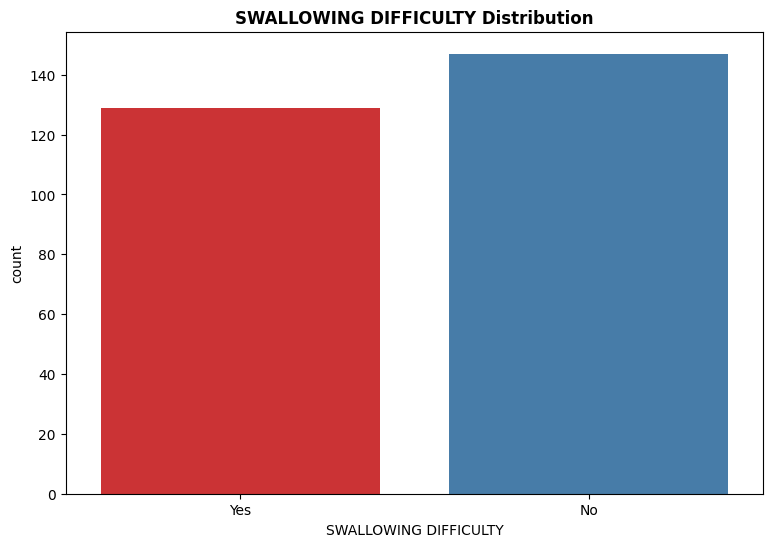

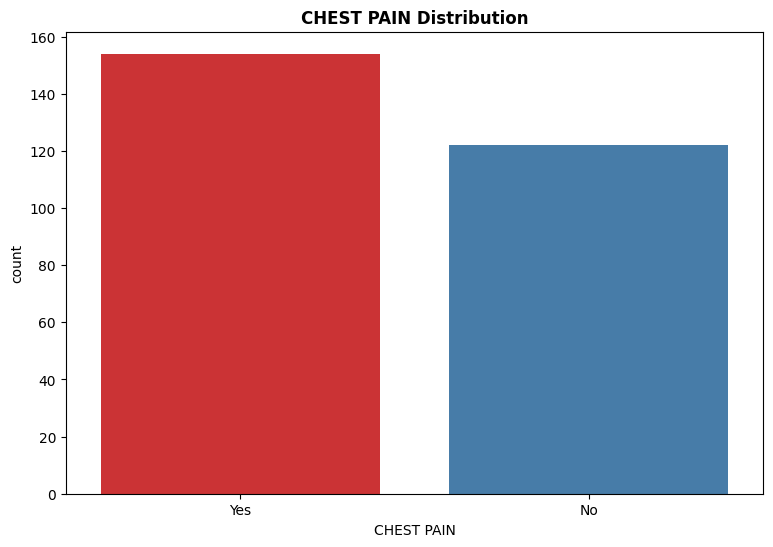

In [29]:
for i in data_categorical.columns:
    plt.figure(figsize = (9,6))
    plt.title(i + ' Distribution', weight = 'bold')
    sns.countplot(x = data_categorical[i], palette = 'Set1')
    plt.show()
    print()

In [30]:
data_categorical.columns

Index(['GENDER', 'SMOKING', 'YELLOW FINGERS', 'ANXIETY', 'PEER PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

### Show value counts information of Categorical Features

In [31]:
data_categorical_list = [data['GENDER'], data['SMOKING'], data['YELLOW FINGERS'], data['ANXIETY'],
                         data['PEER PRESSURE'], data['CHRONIC DISEASE'], data['FATIGUE'], data['ALLERGY'],
                         data['WHEEZING'], data['ALCOHOL CONSUMING'], data['COUGHING'], data['SHORTNESS OF BREATH'],
                         data['SWALLOWING DIFFICULTY'], data['CHEST PAIN']
                        ]

for i in data_categorical_list:
    print('unique values: ')
    print(i.unique())
    print('count of unique values: ', i.nunique())
    print()
    print('value counts: ')
    print(i.value_counts())
    print()
    print('by percentage: ')
    print(i.value_counts(normalize = True).round(2))
    print('-------------------------')

unique values: 
['Male' 'Female']
count of unique values:  2

value counts: 
GENDER
Male      142
Female    134
Name: count, dtype: int64

by percentage: 
GENDER
Male      0.51
Female    0.49
Name: proportion, dtype: float64
-------------------------
unique values: 
['No' 'Yes']
count of unique values:  2

value counts: 
SMOKING
Yes    150
No     126
Name: count, dtype: int64

by percentage: 
SMOKING
Yes    0.54
No     0.46
Name: proportion, dtype: float64
-------------------------
unique values: 
['Yes' 'No']
count of unique values:  2

value counts: 
YELLOW FINGERS
Yes    159
No     117
Name: count, dtype: int64

by percentage: 
YELLOW FINGERS
Yes    0.58
No     0.42
Name: proportion, dtype: float64
-------------------------
unique values: 
['Yes' 'No']
count of unique values:  2

value counts: 
ANXIETY
No     139
Yes    137
Name: count, dtype: int64

by percentage: 
ANXIETY
No     0.5
Yes    0.5
Name: proportion, dtype: float64
-------------------------
unique values: 
['No' 'Yes']


### Categorical Features - 'LUNG CANCER'(target) Relationship

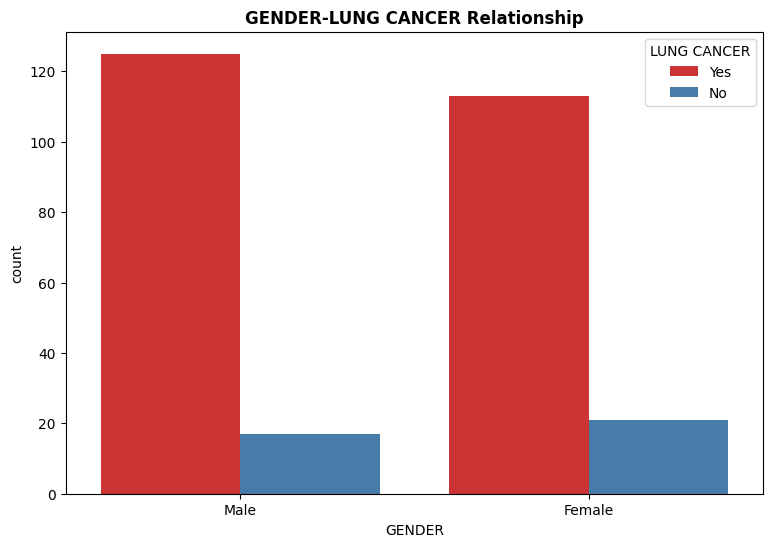

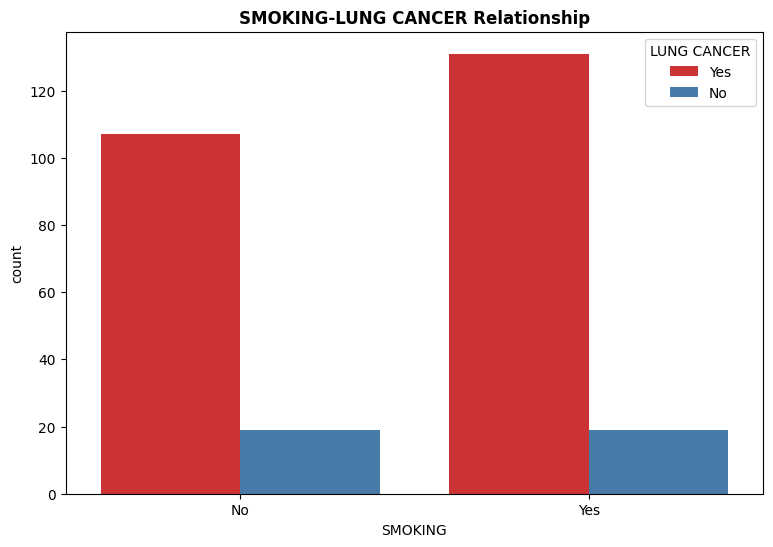

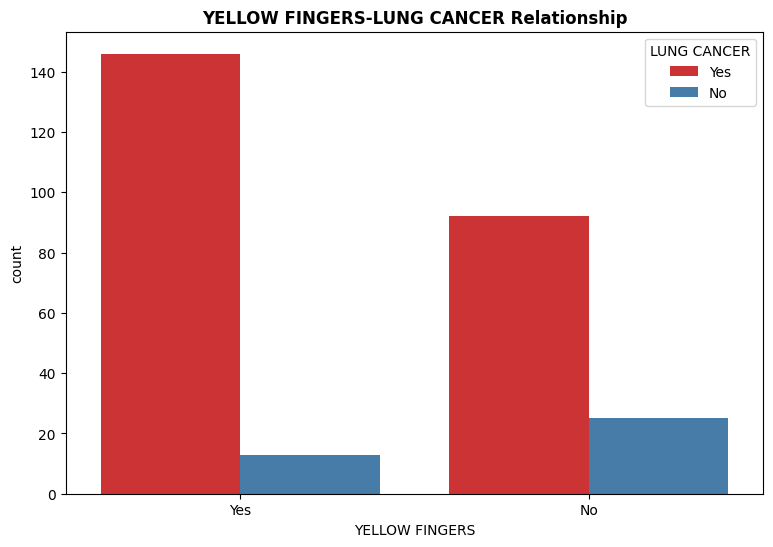

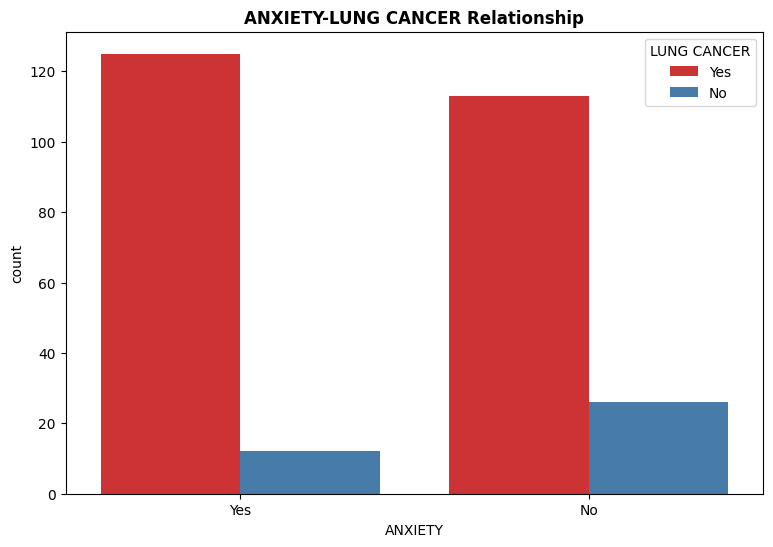

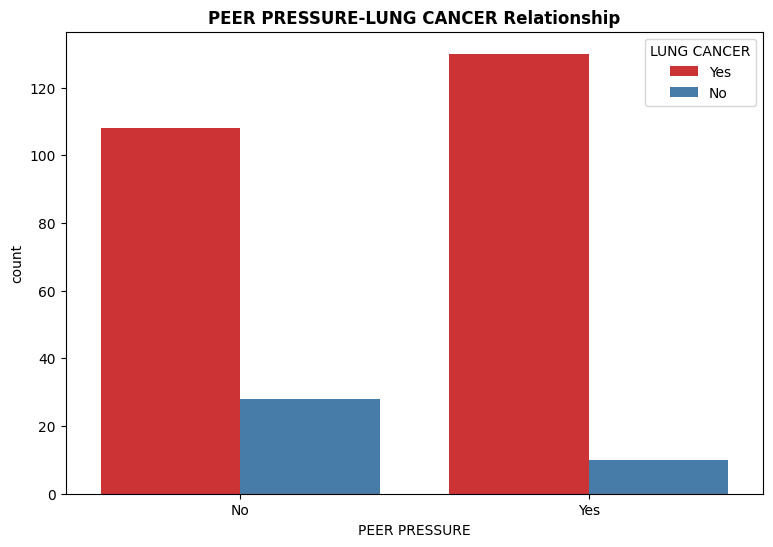

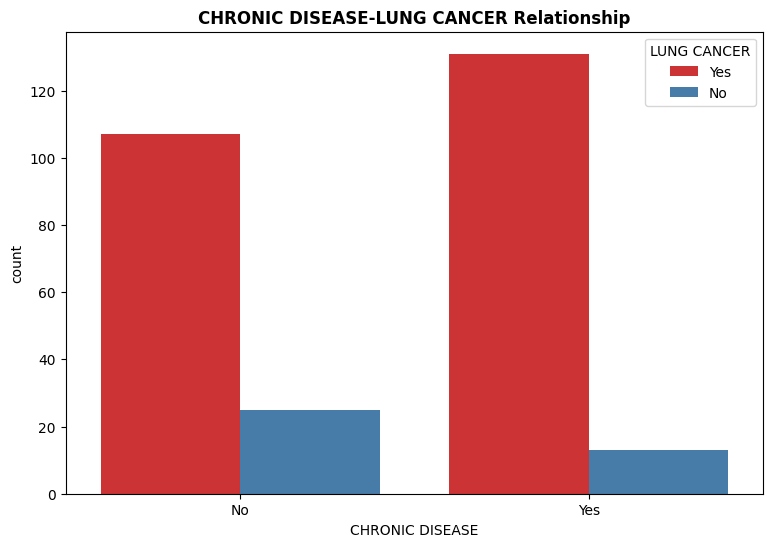

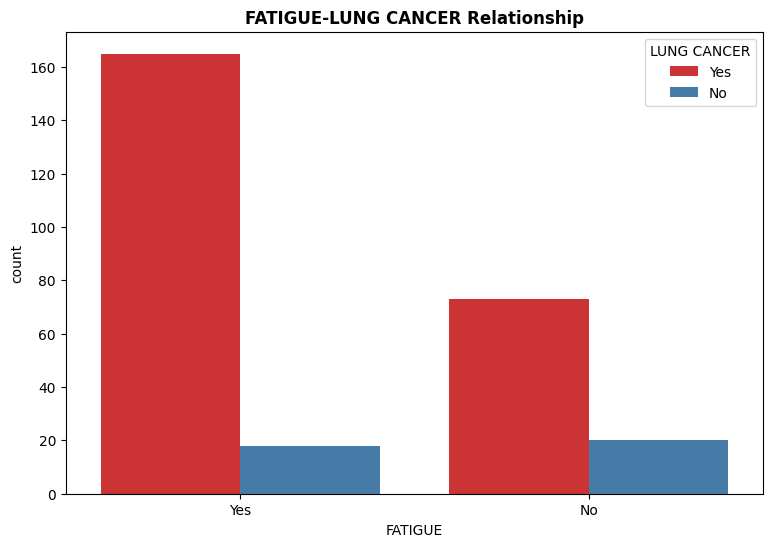

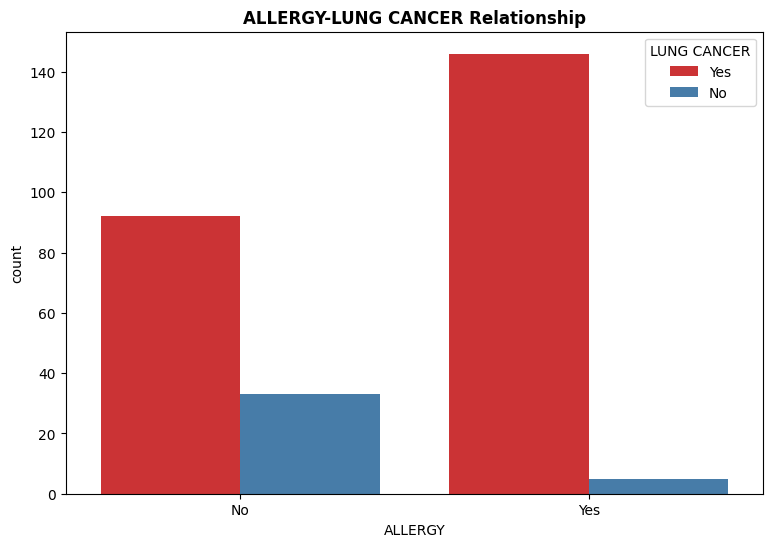

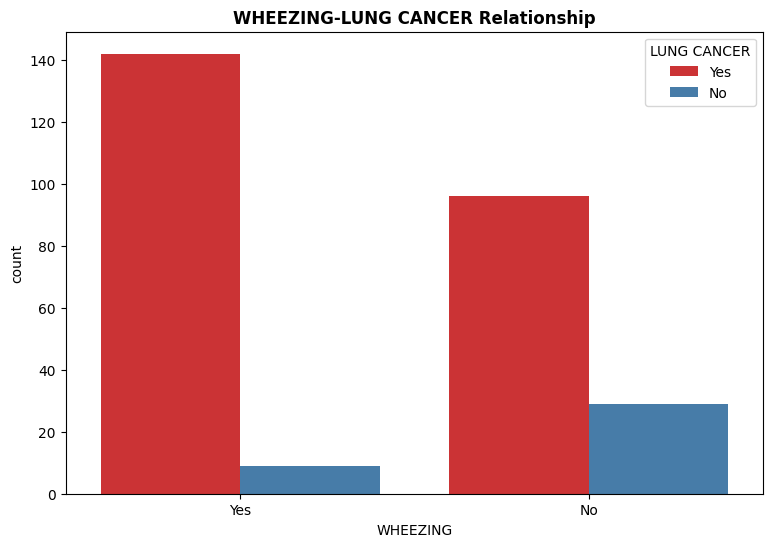

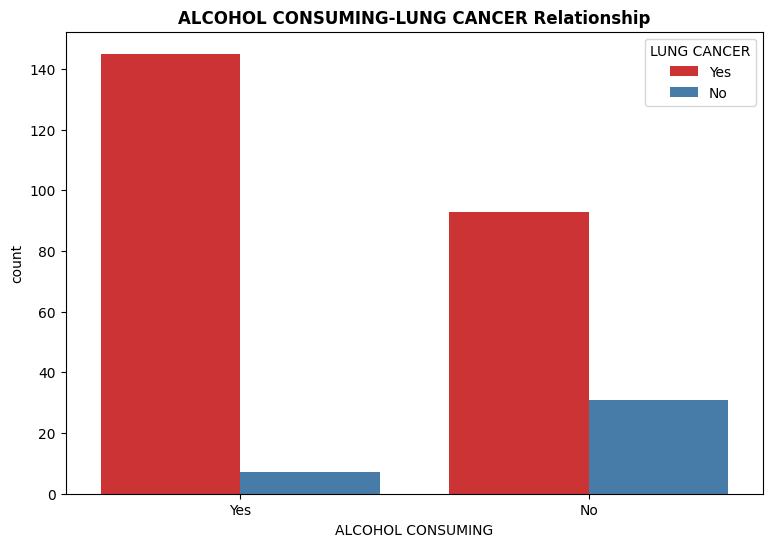

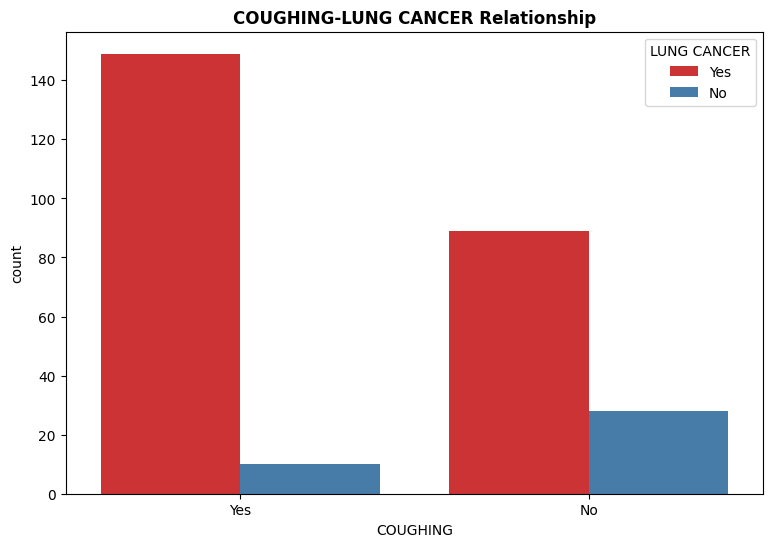

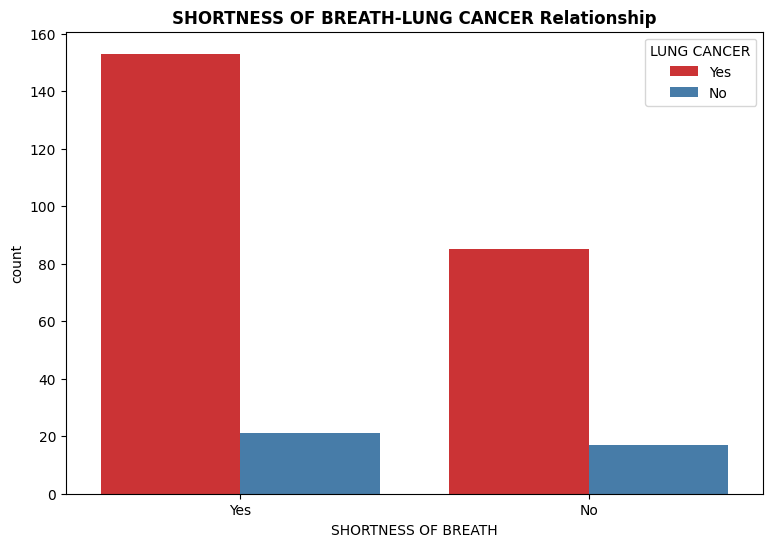

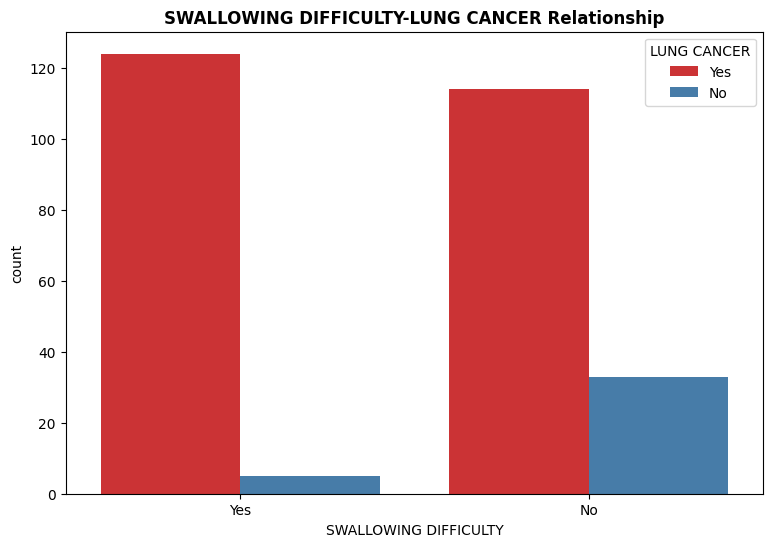

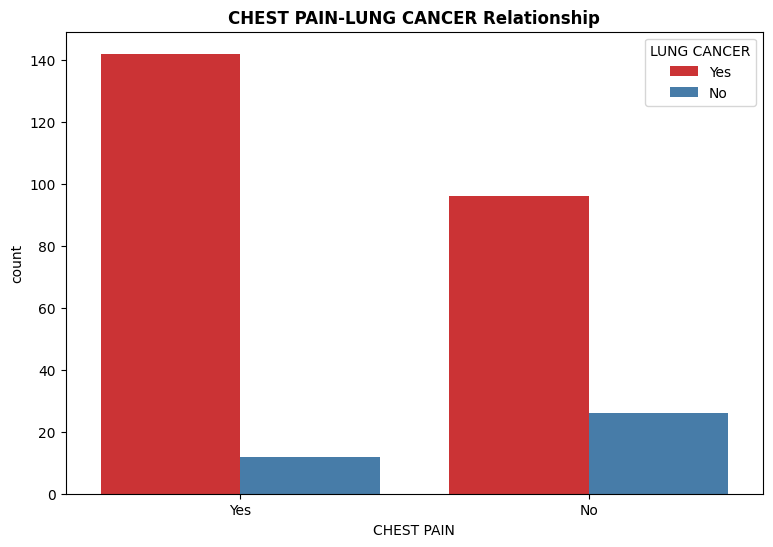

In [32]:
for i in data_categorical.columns:
    plt.figure(figsize = (9,6))
    plt.title(i + '-LUNG CANCER Relationship', weight = 'bold')
    sns.countplot(x = data_categorical[i], hue = data['LUNG CANCER'], palette = 'Set1')
    plt.show()
    print()

## 'LUNG CANCER' (target) Distribution

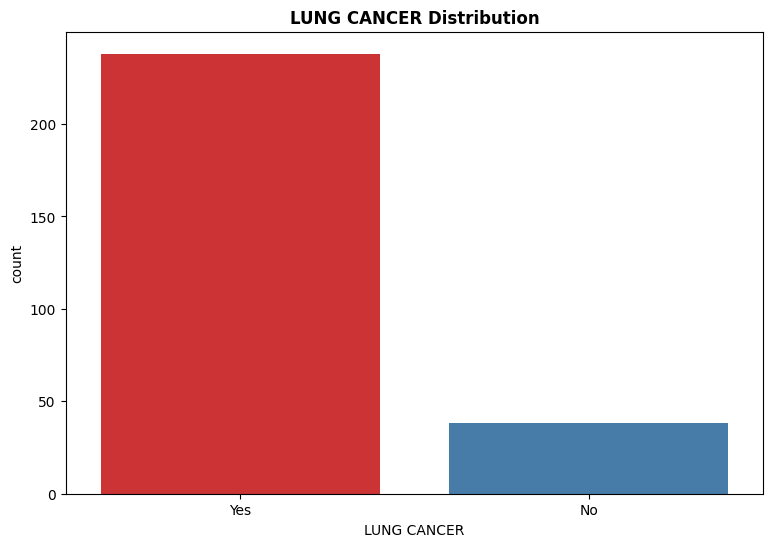

In [33]:
plt.figure(figsize = (9,6))
plt.title('LUNG CANCER Distribution', weight = 'bold')
sns.countplot(x = data['LUNG CANCER'], palette = 'Set1')
plt.show()

### Show value counts information of 'LUNG CANCER'

In [34]:
data['LUNG CANCER'].value_counts()

,count
LUNG CANCER,
Yes,238
No,38


In [35]:
data['LUNG CANCER'].value_counts(normalize = True).round(2)

,proportion
LUNG CANCER,
Yes,0.86
No,0.14


### 86% : Yes (Lung Cancer)
### 14% : No (NOT Lung Cancer)

### Show first 3 rows

In [36]:
data.head(3)

,GENDER,AGE,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No


## Detailed Data Analysis

### ('GENDER','SMOKING') - 'AGE'

In [37]:
data.groupby(['GENDER', 'SMOKING']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
               min max       mean
GENDER SMOKING                   
Female No       38  87  64.296875
       Yes      21  78  61.857143
Male   No       44  78  62.838710
       Yes      39  79  62.775000

### ('GENDER','SMOKING','LUNG CANCER') - 'AGE'

In [38]:
data.groupby(['GENDER', 'SMOKING', 'LUNG CANCER']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                           min max       mean
GENDER SMOKING LUNG CANCER                   
Female No      No           56  87  63.000000
               Yes          38  81  64.566038
       Yes     No           21  71  58.200000
               Yes          44  78  62.466667
Male   No      No           46  69  59.625000
               Yes          44  78  63.314815
       Yes     No           47  69  61.555556
               Yes          39  79  62.929577

### ('GENDER','YELLOW FINGERS') - 'AGE'

In [39]:
data.groupby(['GENDER', 'YELLOW FINGERS']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                      min max       mean
GENDER YELLOW FINGERS                   
Female No              21  87  62.953488
       Yes             38  81  63.054945
Male   No              39  79  62.486486
       Yes             44  78  63.147059

### ('GENDER','YELLOW FINGERS','LUNG CANCER') - 'AGE'

In [40]:
data.groupby(['GENDER', 'YELLOW FINGERS', 'LUNG CANCER']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                                  min max       mean
GENDER YELLOW FINGERS LUNG CANCER                   
Female No             No           21  87  60.714286
                      Yes          49  81  64.034483
       Yes            No           57  67  60.714286
                      Yes          38  81  63.250000
Male   No             No           55  69  64.090909
                      Yes          39  79  62.206349
       Yes            No           46  63  54.333333
                      Yes          44  78  64.000000

### ('GENDER','ANXIETY') - 'AGE'

In [41]:
data.groupby(['GENDER', 'ANXIETY']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
               min max       mean
GENDER ANXIETY                   
Female No       21  87  62.964912
       Yes      44  81  63.064935
Male   No       39  79  62.158537
       Yes      46  77  63.683333

### ('GENDER','ANXIETY','LUNG CANCER') - 'AGE'

In [42]:
data.groupby(['GENDER', 'ANXIETY', 'LUNG CANCER']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                           min max       mean
GENDER ANXIETY LUNG CANCER                   
Female No      No           21  87  60.882353
               Yes          38  81  63.850000
       Yes     No           55  68  60.000000
               Yes          44  81  63.232877
Male   No      No           47  69  61.111111
               Yes          39  79  62.287671
       Yes     No           46  68  60.125000
               Yes          52  77  64.230769

### ('GENDER','PEER PRESSURE') - 'AGE'

In [43]:
data.groupby(['GENDER', 'PEER PRESSURE']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                     min max       mean
GENDER PEER PRESSURE                   
Female No             21  87  62.458333
       Yes            44  81  63.337209
Male   No             46  79  62.659091
       Yes            39  78  63.037037

### ('GENDER','PEER PRESSURE','LUNG CANCER') - 'AGE'

In [44]:
data.groupby(['GENDER', 'PEER PRESSURE', 'LUNG CANCER']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                                 min max       mean
GENDER PEER PRESSURE LUNG CANCER                   
Female No            No           21  87  60.833333
                     Yes          38  75  63.433333
       Yes           No           57  64  60.000000
                     Yes          44  81  63.457831
Male   No            No           46  69  58.200000
                     Yes          48  79  63.230769
       Yes           No           59  69  64.142857
                     Yes          39  78  62.872340

### ('GENDER','CHRONIC DISEASE') - 'AGE'

In [45]:
data.groupby(['GENDER', 'CHRONIC DISEASE']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                       min max       mean
GENDER CHRONIC DISEASE                   
Female No               49  78  62.980392
       Yes              21  87  63.048193
Male   No               39  77  62.913580
       Yes              44  79  62.655738

### ('GENDER','CHRONIC DISEASE',LUNG CANCER) - 'AGE'

In [46]:
data.groupby(['GENDER', 'CHRONIC DISEASE', 'LUNG CANCER']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                                   min max       mean
GENDER CHRONIC DISEASE LUNG CANCER                   
Female No              No           55  70  60.916667
                       Yes          49  78  63.615385
       Yes             No           21  87  60.444444
                       Yes          38  81  63.364865
Male   No              No           46  69  61.153846
                       Yes          39  77  63.250000
       Yes             No           47  68  59.000000
                       Yes          44  79  62.912281

### ('GENDER','FATIGUE') - 'AGE'

In [47]:
data.groupby(['GENDER', 'FATIGUE']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
               min max       mean
GENDER FATIGUE                   
Female No       49  81  62.475000
       Yes      21  87  63.255319
Male   No       46  77  62.792453
       Yes      39  79  62.808989

### ('GENDER','FATIGUE','LUNG CANCER') - 'AGE'

In [48]:
data.groupby(['GENDER', 'FATIGUE', 'LUNG CANCER']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                           min max       mean
GENDER FATIGUE LUNG CANCER                   
Female No      No           56  67  60.125000
               Yes          49  81  63.062500
       Yes     No           21  87  61.076923
               Yes          38  81  63.604938
Male   No      No           46  69  60.416667
               Yes          52  77  63.487805
       Yes     No           55  69  61.200000
               Yes          39  79  62.904762

### ('GENDER','ALLERGY') - 'AGE'

In [49]:
data.groupby(['GENDER', 'ALLERGY']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
               min max       mean
GENDER ALLERGY                   
Female No       44  87  63.267606
       Yes      21  81  62.746032
Male   No       44  78  61.648148
       Yes      39  79  63.511364

### ('GENDER','ALLERGY','LUNG CANCER') - 'AGE'

In [50]:
data.groupby(['GENDER', 'ALLERGY', 'LUNG CANCER']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                           min max       mean
GENDER ALLERGY LUNG CANCER                   
Female No      No           55  87  62.894737
               Yes          44  78  63.403846
       Yes     No           21  59  40.000000
               Yes          38  81  63.491803
Male   No      No           46  69  60.214286
               Yes          44  78  62.150000
       Yes     No           55  69  62.666667
               Yes          39  79  63.541176

### ('GENDER','WHEEZING') - 'AGE'

In [51]:
data.groupby(['GENDER', 'WHEEZING']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                min max       mean
GENDER WHEEZING                   
Female No        21  87  62.362319
       Yes       38  81  63.723077
Male   No        46  79  62.500000
       Yes       39  78  63.000000

### ('GENDER','WHEEZING','LUNG CANCER') - 'AGE'

In [52]:
data.groupby(['GENDER', 'WHEEZING', 'LUNG CANCER']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                            min max       mean
GENDER WHEEZING LUNG CANCER                   
Female No       No           21  87  60.588235
                Yes          44  81  62.942308
       Yes      No           56  67  61.250000
                Yes          38  81  63.885246
Male   No       No           46  69  59.583333
                Yes          48  79  63.295455
       Yes      No           55  69  63.200000
                Yes          39  78  62.987654

### ('GENDER','ALCOHOL CONSUMING') - 'AGE'

In [53]:
data.groupby(['GENDER', 'ALCOHOL CONSUMING']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                         min max       mean
GENDER ALCOHOL CONSUMING                   
Female No                 21  87  62.477778
       Yes                49  81  64.136364
Male   No                 44  78  62.294118
       Yes                39  79  62.962963

### ('GENDER','ALCOHOL CONSUMING','LUNG CANCER') - 'AGE'

In [54]:
data.groupby(['GENDER', 'ALCOHOL CONSUMING', 'LUNG CANCER']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                                     min max       mean
GENDER ALCOHOL CONSUMING LUNG CANCER                   
Female No                No           21  87  60.714286
                         Yes          38  81  63.014493
       Yes               Yes          49  81  64.136364
Male   No                No           46  69  59.100000
                         Yes          44  78  63.625000
       Yes               No           55  69  62.857143
                         Yes          39  79  62.970297

### ('GENDER','COUGHING') - 'AGE'

In [55]:
data.groupby(['GENDER', 'COUGHING']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                min max       mean
GENDER COUGHING                   
Female No        21  87  61.784615
       Yes       38  81  64.188406
Male   No        39  78  60.615385
       Yes       48  79  64.066667

### ('GENDER','COUGHING','LUNG CANCER') - 'AGE'

In [56]:
data.groupby(['GENDER', 'COUGHING', 'LUNG CANCER']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                            min max       mean
GENDER COUGHING LUNG CANCER                   
Female No       No           21  87  60.562500
                Yes          44  77  62.183673
       Yes      No           57  67  61.200000
                Yes          38  81  64.421875
Male   No       No           46  69  59.250000
                Yes          39  78  61.025000
       Yes      No           55  69  64.000000
                Yes          48  79  64.070588

### ('GENDER','SHORTNESS OF BREATH') - 'AGE'

In [57]:
data.groupby(['GENDER', 'SHORTNESS OF BREATH']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                           min max       mean
GENDER SHORTNESS OF BREATH                   
Female No                   49  77  63.130435
       Yes                  21  87  62.965909
Male   No                   46  77  62.910714
       Yes                  39  79  62.732558

### ('GENDER','SHORTNESS OF BREATH',LUNG CANCER) - 'AGE'

In [58]:
data.groupby(['GENDER', 'SHORTNESS OF BREATH', 'LUNG CANCER']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                                       min max       mean
GENDER SHORTNESS OF BREATH LUNG CANCER                   
Female No                  No           55  68  60.166667
                           Yes          49  77  63.575000
       Yes                 No           21  87  60.933333
                           Yes          38  81  63.383562
Male   No                  No           46  69  61.272727
                           Yes          52  77  63.311111
       Yes                 No           55  69  59.500000
                           Yes          39  79  62.975000

### ('GENDER','SWALLOWING DIFFICULTY') - 'AGE'

In [59]:
data.groupby(['GENDER', 'SWALLOWING DIFFICULTY']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                             min max       mean
GENDER SWALLOWING DIFFICULTY                   
Female No                     21  87  62.897059
       Yes                    44  81  63.151515
Male   No                     39  77  62.873418
       Yes                    44  79  62.714286

### ('GENDER','SWALLOWING DIFFICULTY','LUNG CANCER') - 'AGE'

In [60]:
data.groupby(['GENDER', 'SWALLOWING DIFFICULTY', 'LUNG CANCER']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                                         min max       mean
GENDER SWALLOWING DIFFICULTY LUNG CANCER                   
Female No                    No           21  87  60.950000
                             Yes          38  81  63.708333
       Yes                   No           56  56  56.000000
                             Yes          44  81  63.261538
Male   No                    No           47  69  62.076923
                             Yes          39  77  63.030303
       Yes                   No           46  63  56.000000
                             Yes          44  79  63.169492

### ('GENDER','CHEST PAIN') - 'AGE'

In [61]:
data.groupby(['GENDER', 'CHEST PAIN']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                  min max       mean
GENDER CHEST PAIN                   
Female No          21  87  63.119048
       Yes         38  81  62.860000
Male   No          52  77  63.526316
       Yes         39  79  62.538462

### ('GENDER','CHEST PAIN','LUNG CANCER') - 'AGE'

In [62]:
data.groupby(['GENDER', 'CHEST PAIN', 'LUNG CANCER']).agg({'AGE': ['min', 'max', 'mean']})

AGE               
                              min max       mean
GENDER CHEST PAIN LUNG CANCER                   
Female No         No           21  87  61.000000
                  Yes          44  81  63.738462
       Yes        No           57  59  58.000000
                  Yes          38  81  63.062500
Male   No         No           55  68  61.571429
                  Yes          52  77  63.967742
       Yes        No           46  69  60.000000
                  Yes          39  79  62.808511

### Show first 3 rows again

In [63]:
data.head(3)

,GENDER,AGE,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No


### 'GENDER' - 'SMOKING'

In [64]:
field1 = data['GENDER']
field2 = data['SMOKING']

cross_table = pd.crosstab(field1,field2)
cross_table

SMOKING,No,Yes
GENDER,,
Female,64,70
Male,62,80


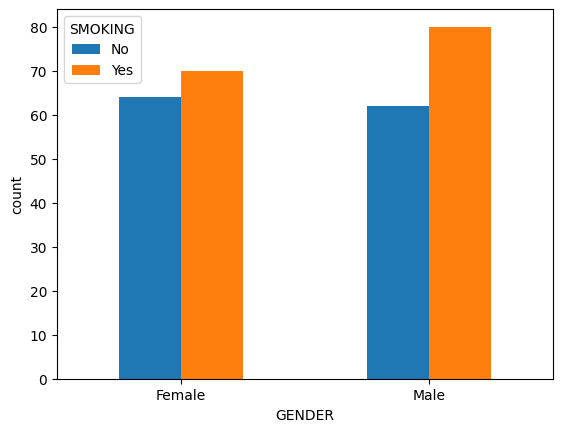

In [65]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### 'GENDER' - 'YELLOW FINGERS'

In [66]:
field1 = data['GENDER']
field2 = data['YELLOW FINGERS']

cross_table = pd.crosstab(field1,field2)
cross_table

YELLOW FINGERS,No,Yes
GENDER,,
Female,43,91
Male,74,68


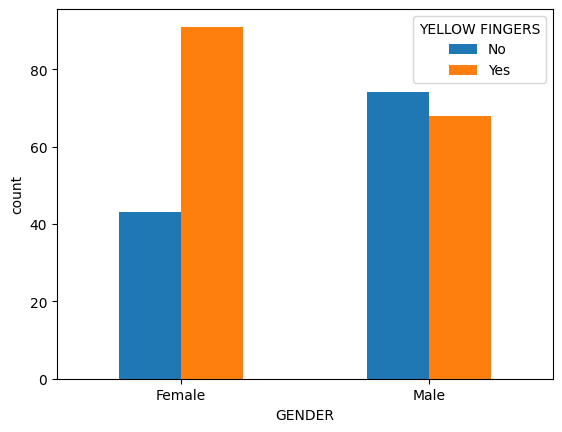

In [67]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### 'GENDER' - 'ANXIETY'

In [68]:
field1 = data['GENDER']
field2 = data['ANXIETY']

cross_table = pd.crosstab(field1,field2)
cross_table

ANXIETY,No,Yes
GENDER,,
Female,57,77
Male,82,60


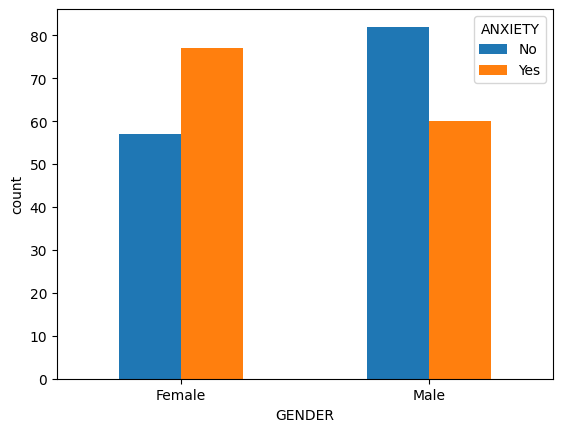

In [69]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### 'GENDER' - 'PEER PRESSURE'

In [70]:
field1 = data['GENDER']
field2 = data['PEER PRESSURE']

cross_table = pd.crosstab(field1,field2)
cross_table

PEER PRESSURE,No,Yes
GENDER,,
Female,48,86
Male,88,54


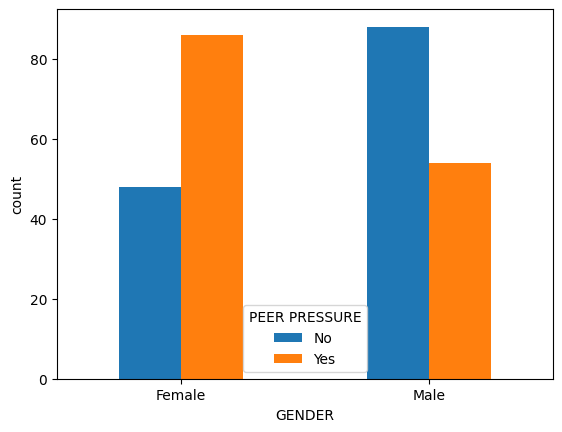

In [71]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### 'GENDER' - 'CHRONIC DISEASE'

In [72]:
field1 = data['GENDER']
field2 = data['CHRONIC DISEASE']

cross_table = pd.crosstab(field1,field2)
cross_table

CHRONIC DISEASE,No,Yes
GENDER,,
Female,51,83
Male,81,61


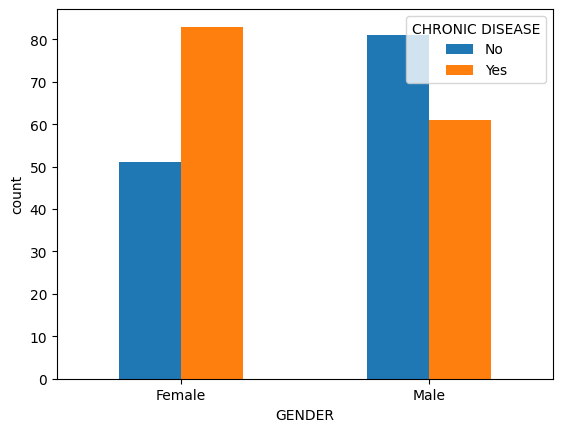

In [73]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### 'GENDER' - 'FATIGUE'

In [74]:
field1 = data['GENDER']
field2 = data['FATIGUE']

cross_table = pd.crosstab(field1,field2)
cross_table

FATIGUE,No,Yes
GENDER,,
Female,40,94
Male,53,89


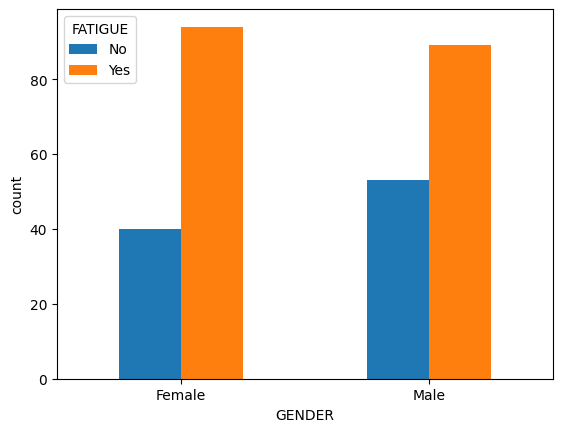

In [75]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### 'GENDER' - 'ALLERGY'

In [76]:
field1 = data['GENDER']
field2 = data['ALLERGY']

cross_table = pd.crosstab(field1,field2)
cross_table

ALLERGY,No,Yes
GENDER,,
Female,71,63
Male,54,88


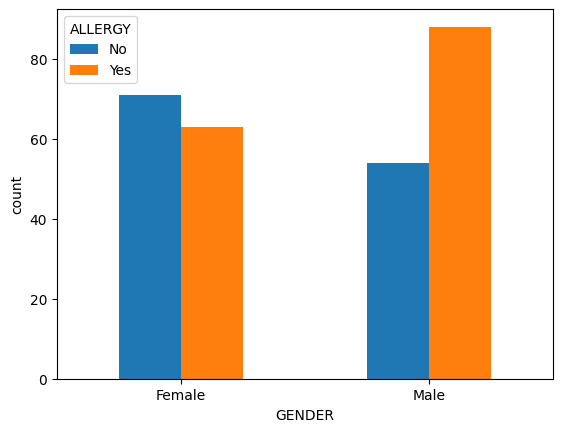

In [77]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### 'GENDER' - 'WHEEZING'

In [78]:
field1 = data['GENDER']
field2 = data['WHEEZING']

cross_table = pd.crosstab(field1,field2)
cross_table

WHEEZING,No,Yes
GENDER,,
Female,69,65
Male,56,86


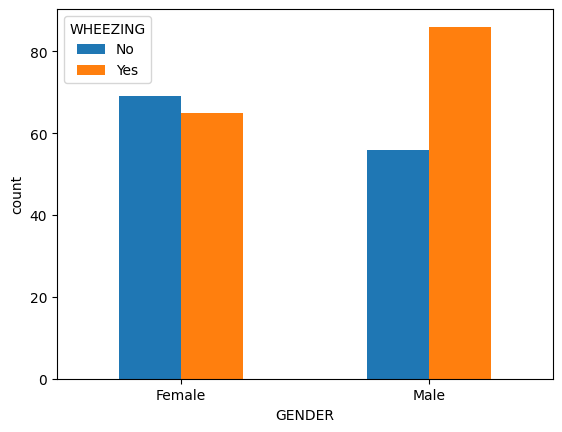

In [79]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### 'GENDER' - 'ALCOHOL CONSUMING'

In [80]:
field1 = data['GENDER']
field2 = data['ALCOHOL CONSUMING']

cross_table = pd.crosstab(field1,field2)
cross_table

ALCOHOL CONSUMING,No,Yes
GENDER,,
Female,90,44
Male,34,108


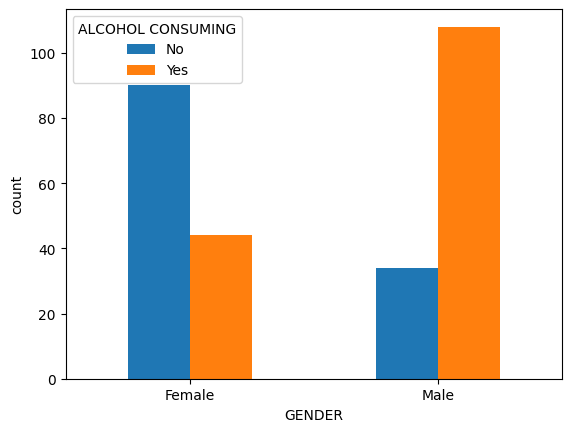

In [81]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### 'GENDER' - 'COUGHING'

In [82]:
field1 = data['GENDER']
field2 = data['COUGHING']

cross_table = pd.crosstab(field1,field2)
cross_table

COUGHING,No,Yes
GENDER,,
Female,65,69
Male,52,90


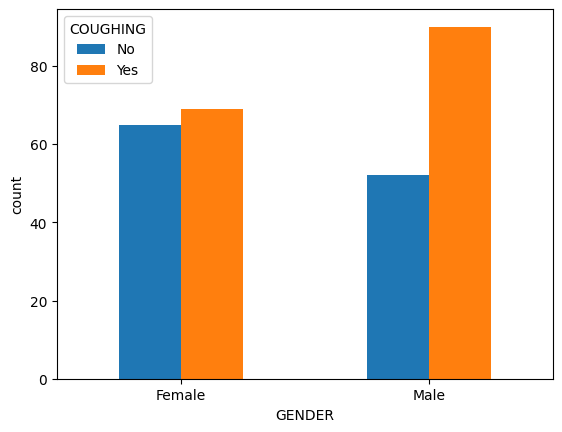

In [83]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### 'GENDER' - 'SHORTNESS OF BREATH'

In [84]:
field1 = data['GENDER']
field2 = data['SHORTNESS OF BREATH']

cross_table = pd.crosstab(field1,field2)
cross_table

SHORTNESS OF BREATH,No,Yes
GENDER,,
Female,46,88
Male,56,86


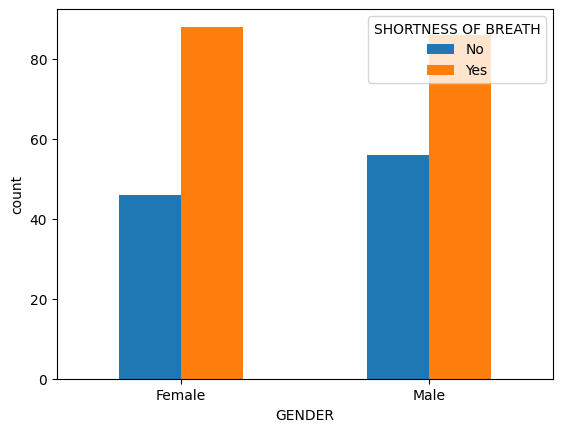

In [85]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### 'GENDER' - 'SWALLOWING DIFFICULTY'

In [86]:
field1 = data['GENDER']
field2 = data['SWALLOWING DIFFICULTY']

cross_table = pd.crosstab(field1,field2)
cross_table

SWALLOWING DIFFICULTY,No,Yes
GENDER,,
Female,68,66
Male,79,63


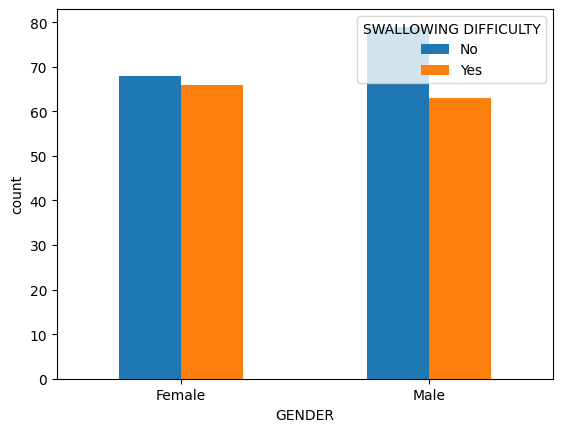

In [87]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### 'GENDER' - 'CHEST PAIN'

In [88]:
field1 = data['GENDER']
field2 = data['CHEST PAIN']

cross_table = pd.crosstab(field1,field2)
cross_table

CHEST PAIN,No,Yes
GENDER,,
Female,84,50
Male,38,104


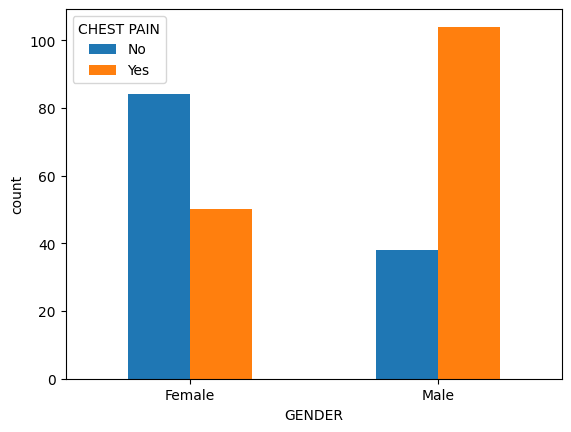

In [89]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### 'GENDER' - 'LUNG CANCER'

In [90]:
field1 = data['GENDER']
field2 = data['LUNG CANCER']

cross_table = pd.crosstab(field1,field2)
cross_table

LUNG CANCER,No,Yes
GENDER,,
Female,21,113
Male,17,125


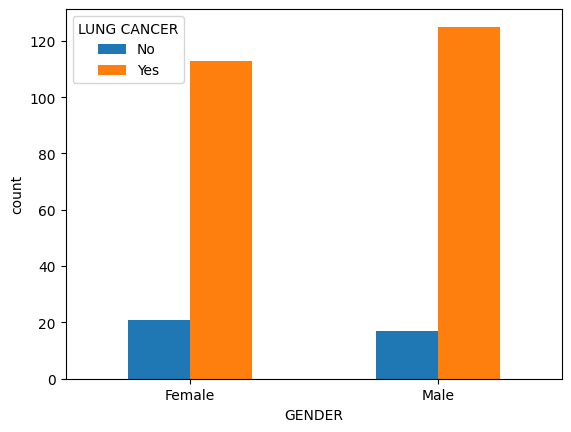

In [91]:
cross_table.plot(kind = 'bar')
plt.xticks(rotation = 0)
plt.ylabel('count')
plt.show()

### Show first 5 rows again

In [92]:
data.head()

,GENDER,AGE,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG CANCER
0,Male,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1,Male,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes
2,Female,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No
3,Male,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,No
4,Female,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,No


## Encoding of Categorical Data

In [93]:
le = LabelEncoder()

In [94]:
for col in data.select_dtypes(include = 'object').columns:
        data[col] = le.fit_transform(data[col])

### Show first 5 rows after encoding of labels

In [95]:
data.head()

,GENDER,AGE,SMOKING,YELLOW FINGERS,ANXIETY,PEER PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG CANCER
0,1,69,0,1,1,0,0,1,0,1,1,1,1,1,1,1
1,1,74,1,0,0,0,1,1,1,0,0,0,1,1,1,1
2,0,59,0,0,0,1,0,1,0,1,0,1,1,0,1,0
3,1,63,1,1,1,0,0,0,0,0,1,0,0,1,1,0
4,0,63,0,1,0,0,0,0,0,1,0,1,1,0,0,0


In [96]:
le.inverse_transform([0,1])

array(['No', 'Yes'], dtype=object)

### 0 ---> No , 1 ---> Yes   for all encoded columns except 'GENDER'
### 0 ---> Female , 1 ---> Male  for column 'GENDER'

## Define Dependent and Independent Variables

In [97]:
x = data.drop(columns = ['LUNG CANCER']) # inputs

y = data['LUNG CANCER']                  # target

In [98]:
x.shape, y.shape

((276, 15), (276,))

### Splitting Data into Training and Testing Sets

In [99]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [100]:
x_train.shape, y_train.shape

((220, 15), (220,))

In [101]:
x_test.shape, y_test.shape

((56, 15), (56,))

In [102]:
y_test.value_counts()

,count
LUNG CANCER,
1,44
0,12


In [103]:
y_test.value_counts(normalize = True).round(2)

,proportion
LUNG CANCER,
1,0.79
0,0.21


### 79% ---> 1 (Yes)(Lung Cancer)
### 21% ---> 0 (No)(NOT Lung Cancer)

### Remember that target variable is unbalanced!!!

## Create a more balanced data set by combining both over-sampling and under-sampling methods

In [104]:
smoteenn = SMOTEENN(random_state = 42)

x_train_resampled, y_train_resampled = smoteenn.fit_resample(x_train, y_train)

## Build ROC(Receiver Operating Characteristic) Curve Function

In [105]:
def ROC_Curve(model, x_test):
    y_pred_proba = model.predict_proba(x_test)[:,1]
    FPR, TPR, thresholds = roc_curve(y_test, y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.title('ROC Curve', fontsize = 16, weight = 'bold')
    plt.xlabel('False Positive Rate(FPR)', fontsize = 14)
    plt.ylabel('True Positive Rate(TPR)', fontsize = 14)
    plt.plot(FPR, TPR, label = 'Area Under ROC Curve: %0.2f' %(auc))
    plt.legend()
    plt.show()

## Logistic Regression

In [106]:
logistic_reg = LogisticRegression(solver = 'liblinear')

logistic_reg.fit(x_train_resampled, y_train_resampled)

LogisticRegression(solver='liblinear')

### Predictions based on test data

In [107]:
logistic_reg_predictions = logistic_reg.predict(x_test)

print('NOT Lung Cancer', sum(logistic_reg_predictions == 0))
print('Lung Cancer', sum(logistic_reg_predictions == 1))

NOT Lung Cancer 13
Lung Cancer 43


### Confusion Matrix

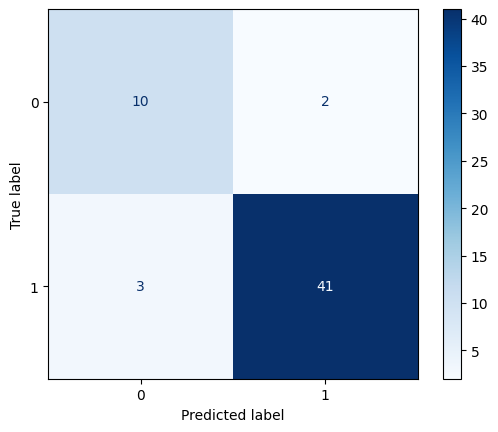

In [108]:
ConfusionMatrixDisplay.from_predictions(y_test, logistic_reg_predictions,
                                        labels = logistic_reg.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [109]:
print(classification_report(y_test, logistic_reg_predictions))

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        12
           1       0.95      0.93      0.94        44

    accuracy                           0.91        56
   macro avg       0.86      0.88      0.87        56
weighted avg       0.91      0.91      0.91        56



## Accuracy of Model: 0.91 = 91%

### ROC Curve

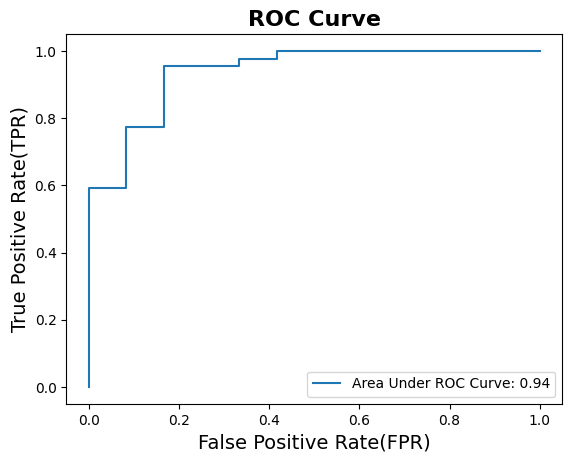

In [110]:
ROC_Curve(logistic_reg, x_test)

## Decision Tree Classifier

In [111]:
decision_tree_clf = DecisionTreeClassifier(ccp_alpha = 0.001, class_weight = 'balanced', criterion = 'gini', random_state = 42)

decision_tree_clf.fit(x_train_resampled, y_train_resampled)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight='balanced',
                       random_state=42)

### Predictions based on test data

In [112]:
decision_tree_predictions = decision_tree_clf.predict(x_test)

print('NOT Lung Cancer', sum(decision_tree_predictions == 0))
print('Lung Cancer', sum(decision_tree_predictions == 1))

NOT Lung Cancer 10
Lung Cancer 46


### Confusion Matrix

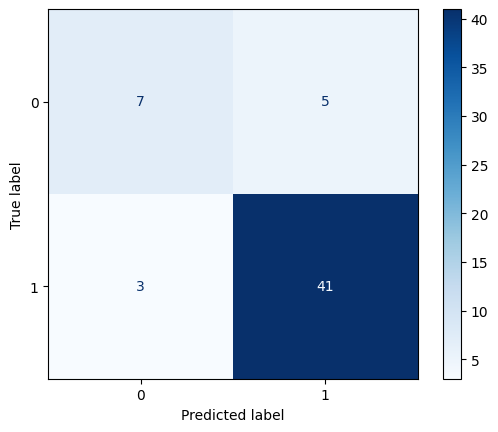

In [113]:
ConfusionMatrixDisplay.from_predictions(y_test, decision_tree_predictions,
                                        labels = decision_tree_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [114]:
print(classification_report(y_test, decision_tree_predictions))

              precision    recall  f1-score   support

           0       0.70      0.58      0.64        12
           1       0.89      0.93      0.91        44

    accuracy                           0.86        56
   macro avg       0.80      0.76      0.77        56
weighted avg       0.85      0.86      0.85        56



## Accuracy of Model: 0.86 = 86%

### Model fails to predict 0(No)

### ROC Curve

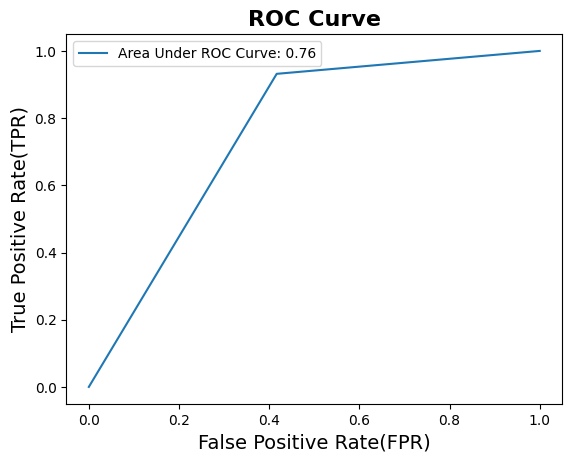

In [115]:
ROC_Curve(decision_tree_clf, x_test)

### Feature Engineering

In [116]:
decision_tree_feature_importances = pd.DataFrame({'Feature': decision_tree_clf.feature_names_in_ ,
                                                  'Importance': decision_tree_clf.feature_importances_})

decision_tree_feature_importances['Importance'] = decision_tree_feature_importances['Importance'].round(4)

decision_tree_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,ALLERGY,0.5590
1,SWALLOWING DIFFICULTY,0.2767
2,AGE,0.0509
3,ALCOHOL CONSUMING,0.0481
4,FATIGUE,0.0348
5,GENDER,0.0099
6,CHRONIC DISEASE,0.0097
7,CHEST PAIN,0.0082
8,YELLOW FINGERS,0.0028
9,SMOKING,0.0000


### Visualizing of Feature Importances

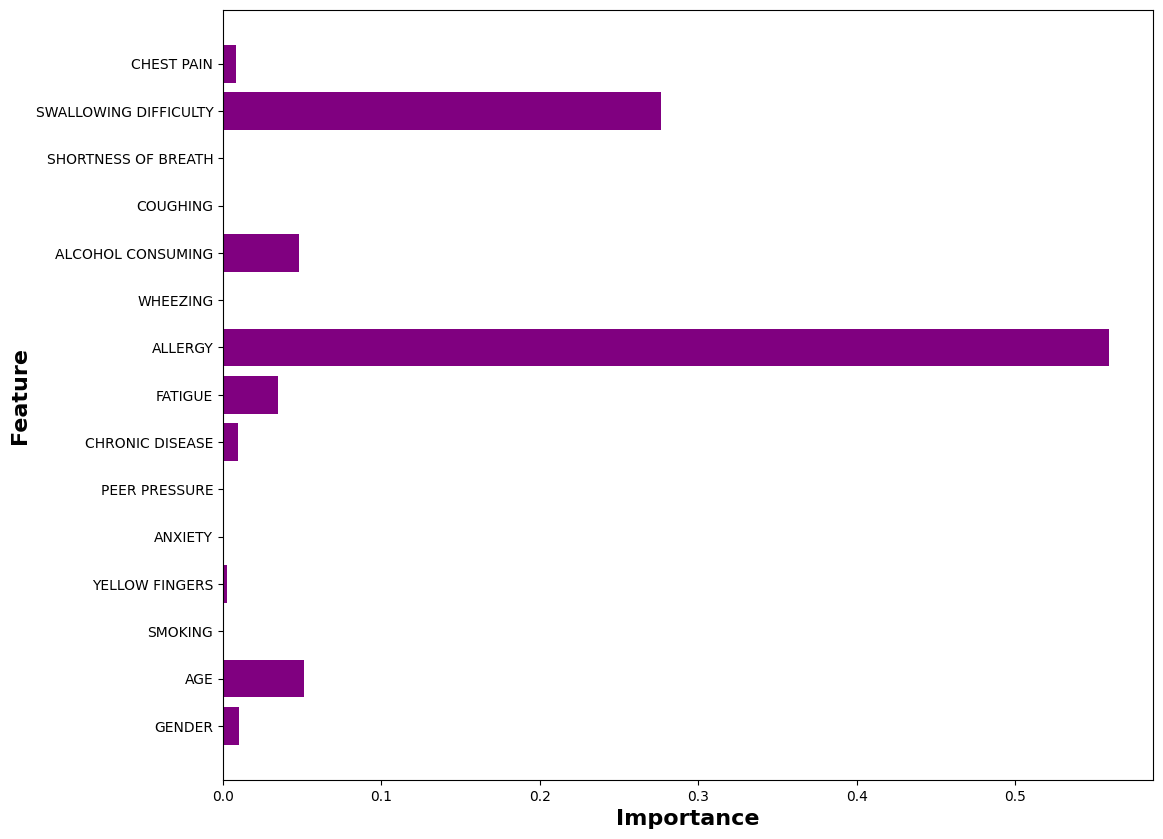

In [117]:
plt.figure(figsize = (12,10))

plt.barh(decision_tree_feature_importances['Feature'],
         decision_tree_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

### Show features which are Importance < 0.01

In [118]:
decision_tree_feature_importances[decision_tree_feature_importances['Importance'] < 0.01].reset_index(drop = True)

,Feature,Importance
0,GENDER,0.0099
1,SMOKING,0.0000
2,YELLOW FINGERS,0.0028
3,ANXIETY,0.0000
4,PEER PRESSURE,0.0000
5,CHRONIC DISEASE,0.0097
6,WHEEZING,0.0000
7,COUGHING,0.0000
8,SHORTNESS OF BREATH,0.0000
9,CHEST PAIN,0.0082


### These 10 features have not contributed to model

## Random Forest Classifier

In [119]:
random_forest_clf = RandomForestClassifier(ccp_alpha = 0.001, class_weight = 'balanced', criterion = 'gini', random_state = 42)

random_forest_clf.fit(x_train_resampled, y_train_resampled)

RandomForestClassifier(ccp_alpha=0.001, class_weight='balanced',
                       random_state=42)

### Predictions based on test data

In [120]:
random_forest_predictions = random_forest_clf.predict(x_test)

print('NOT Lung Cancer', sum(random_forest_predictions == 0))
print('Lung Cancer', sum(random_forest_predictions == 1))

NOT Lung Cancer 12
Lung Cancer 44


### Confusion Matrix

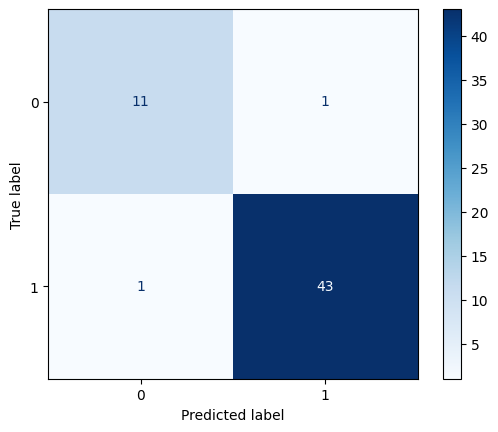

In [121]:
ConfusionMatrixDisplay.from_predictions(y_test, random_forest_predictions,
                                        labels = random_forest_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [122]:
print(classification_report(y_test, random_forest_predictions))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       0.98      0.98      0.98        44

    accuracy                           0.96        56
   macro avg       0.95      0.95      0.95        56
weighted avg       0.96      0.96      0.96        56



## Accuracy of Model: 0.96 = 96%

### ROC Curve

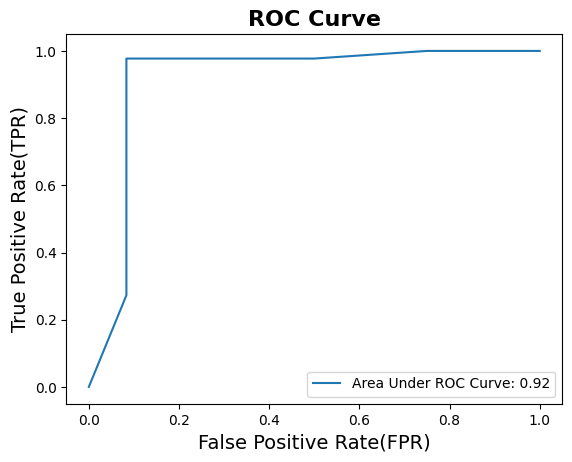

In [123]:
ROC_Curve(random_forest_clf, x_test)

### Feature Engineering

In [124]:
random_forest_feature_importances = pd.DataFrame({'Feature': random_forest_clf.feature_names_in_ ,
                                                  'Importance': random_forest_clf.feature_importances_})

random_forest_feature_importances['Importance'] = random_forest_feature_importances['Importance'].round(4)

random_forest_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,ALLERGY,0.2191
1,ALCOHOL CONSUMING,0.1557
2,SWALLOWING DIFFICULTY,0.1019
3,WHEEZING,0.0991
4,COUGHING,0.0983
5,CHRONIC DISEASE,0.0607
6,PEER PRESSURE,0.0559
7,YELLOW FINGERS,0.0458
8,AGE,0.0367
9,FATIGUE,0.0361


### Visualizing of Feature Importances

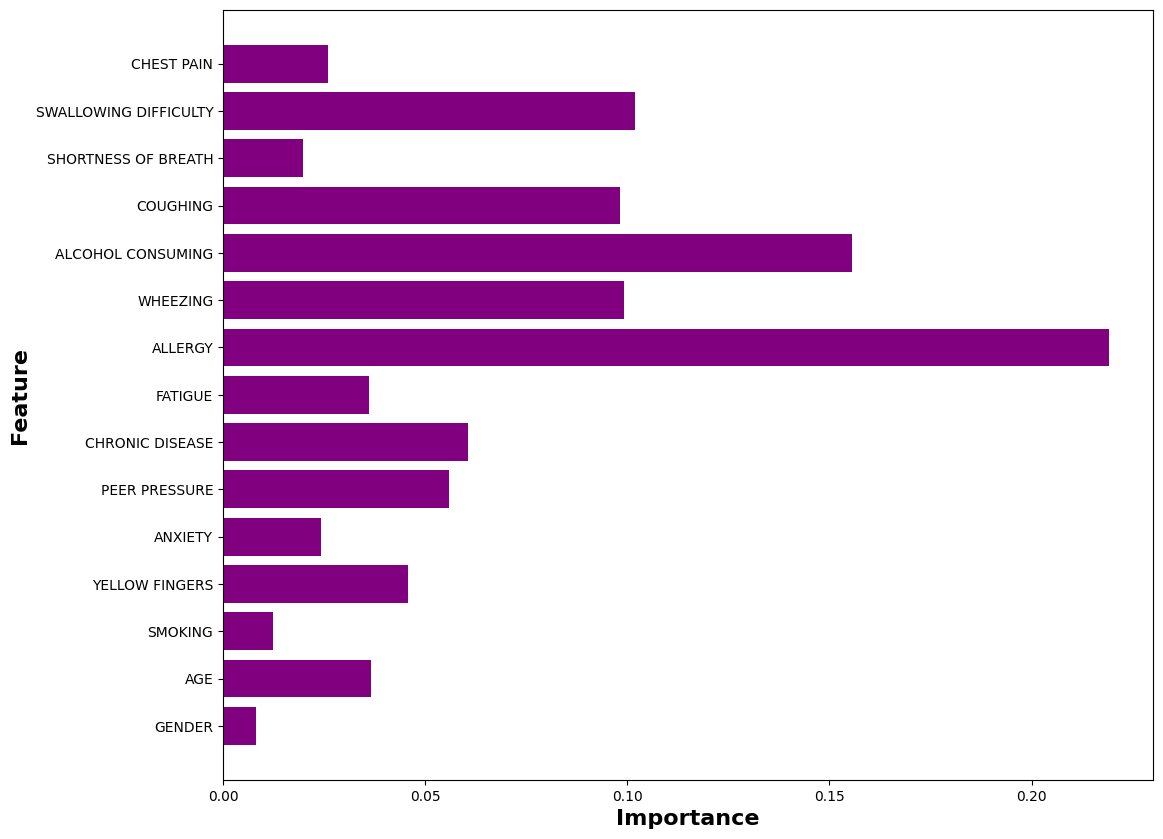

In [125]:
plt.figure(figsize = (12,10))

plt.barh(random_forest_feature_importances['Feature'],
         random_forest_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

### Show features which are Importance < 0.01

In [126]:
random_forest_feature_importances[random_forest_feature_importances['Importance'] < 0.01].reset_index(drop = True)

,Feature,Importance
0,GENDER,0.0082


### This feature has not contributed to model

## Gradient Boosting Classifier

In [127]:
GB_clf = GradientBoostingClassifier(ccp_alpha = 0.001, learning_rate = 1, random_state = 42)

GB_clf.fit(x_train_resampled, y_train_resampled)

GradientBoostingClassifier(ccp_alpha=0.001, learning_rate=1, random_state=42)

### Predictions based on test data

In [128]:
GBC_predictions = GB_clf.predict(x_test)

print('NOT Lung Cancer', sum(GBC_predictions == 0))
print('Lung Cancer', sum(GBC_predictions == 1))

NOT Lung Cancer 13
Lung Cancer 43


### Confusion Matrix

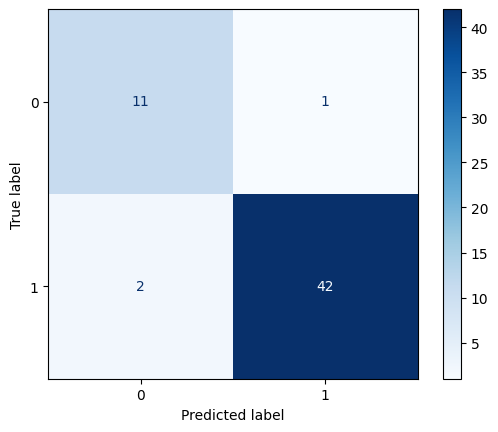

In [129]:
ConfusionMatrixDisplay.from_predictions(y_test, GBC_predictions,
                                        labels = GB_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [130]:
print(classification_report(y_test, GBC_predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.98      0.95      0.97        44

    accuracy                           0.95        56
   macro avg       0.91      0.94      0.92        56
weighted avg       0.95      0.95      0.95        56



## Accuracy of Model: 0.95 = 95%

### ROC Curve

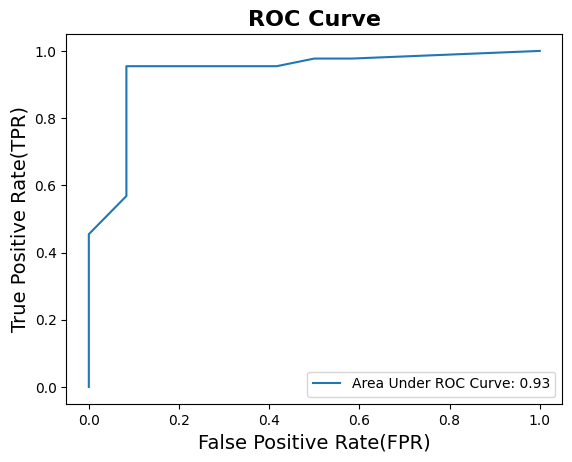

In [131]:
ROC_Curve(GB_clf, x_test)

### Feature Engineering

In [132]:
GBC_feature_importances = pd.DataFrame({'Feature': GB_clf.feature_names_in_ ,
                                        'Importance': GB_clf.feature_importances_})

GBC_feature_importances['Importance'] = GBC_feature_importances['Importance'].round(4)

GBC_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,ALLERGY,0.5949
1,SWALLOWING DIFFICULTY,0.2683
2,ALCOHOL CONSUMING,0.0458
3,COUGHING,0.0421
4,WHEEZING,0.0208
5,AGE,0.0172
6,PEER PRESSURE,0.0067
7,FATIGUE,0.0042
8,GENDER,0.0000
9,SMOKING,0.0000


### Visualizing of Feature Importances

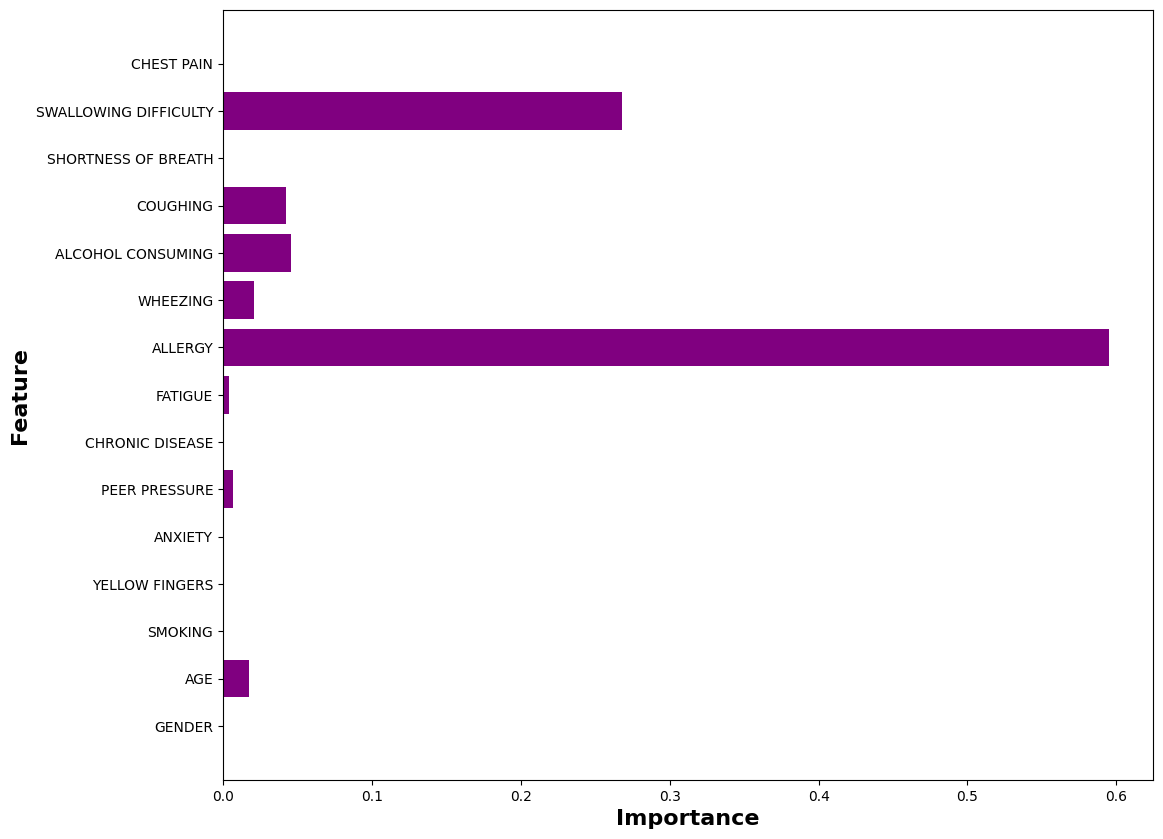

In [133]:
plt.figure(figsize = (12,10))

plt.barh(GBC_feature_importances['Feature'],
         GBC_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

### Show features which are Importance < 0.01

In [134]:
GBC_feature_importances[GBC_feature_importances['Importance'] < 0.01].reset_index(drop = True)

,Feature,Importance
0,GENDER,0.0000
1,SMOKING,0.0000
2,YELLOW FINGERS,0.0000
3,ANXIETY,0.0000
4,PEER PRESSURE,0.0067
5,CHRONIC DISEASE,0.0000
6,FATIGUE,0.0042
7,SHORTNESS OF BREATH,0.0000
8,CHEST PAIN,0.0000


### These 9 features have not contributed to model

## Ada Boost Classifier

In [135]:
AB_clf = AdaBoostClassifier(algorithm = 'SAMME', learning_rate = 1, random_state = 42)

AB_clf.fit(x_train_resampled, y_train_resampled)

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, random_state=42)

### Predictions based on test data

In [136]:
AB_predictions = AB_clf.predict(x_test)

print('NOT Lung Cancer', sum(AB_predictions == 0))
print('Lung Cancer', sum(AB_predictions == 1))

NOT Lung Cancer 14
Lung Cancer 42


### Confusion Matrix

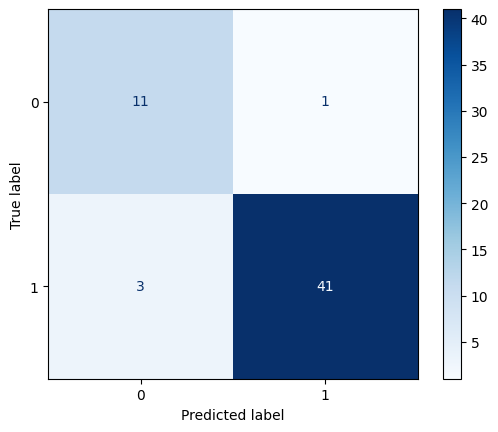

In [137]:
ConfusionMatrixDisplay.from_predictions(y_test, AB_predictions,
                                        labels = AB_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [138]:
print(classification_report(y_test, AB_predictions))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.98      0.93      0.95        44

    accuracy                           0.93        56
   macro avg       0.88      0.92      0.90        56
weighted avg       0.94      0.93      0.93        56



## Accuracy of Model: 0.93 = 93%

### ROC Curve

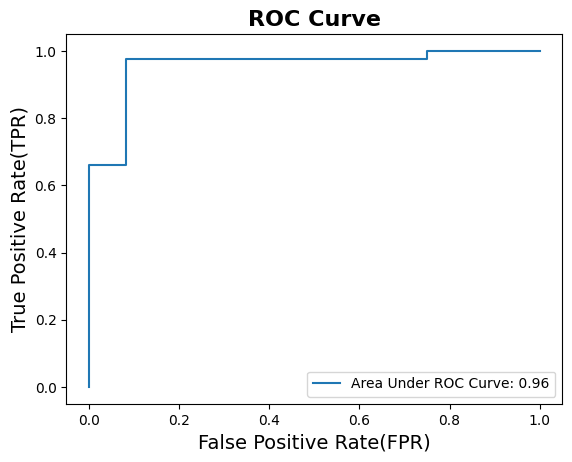

In [139]:
ROC_Curve(AB_clf, x_test)

### Feature Engineering

In [140]:
AdaBoost_feature_importances = pd.DataFrame({'Feature': AB_clf.feature_names_in_ ,
                                             'Importance': AB_clf.feature_importances_})

AdaBoost_feature_importances['Importance'] = AdaBoost_feature_importances['Importance'].round(4)

AdaBoost_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,ALCOHOL CONSUMING,0.2228
1,SWALLOWING DIFFICULTY,0.1595
2,ALLERGY,0.1133
3,YELLOW FINGERS,0.0909
4,FATIGUE,0.0737
5,COUGHING,0.0714
6,CHEST PAIN,0.0577
7,AGE,0.0551
8,SMOKING,0.0426
9,CHRONIC DISEASE,0.0418


### Visualizing of Feature Importances

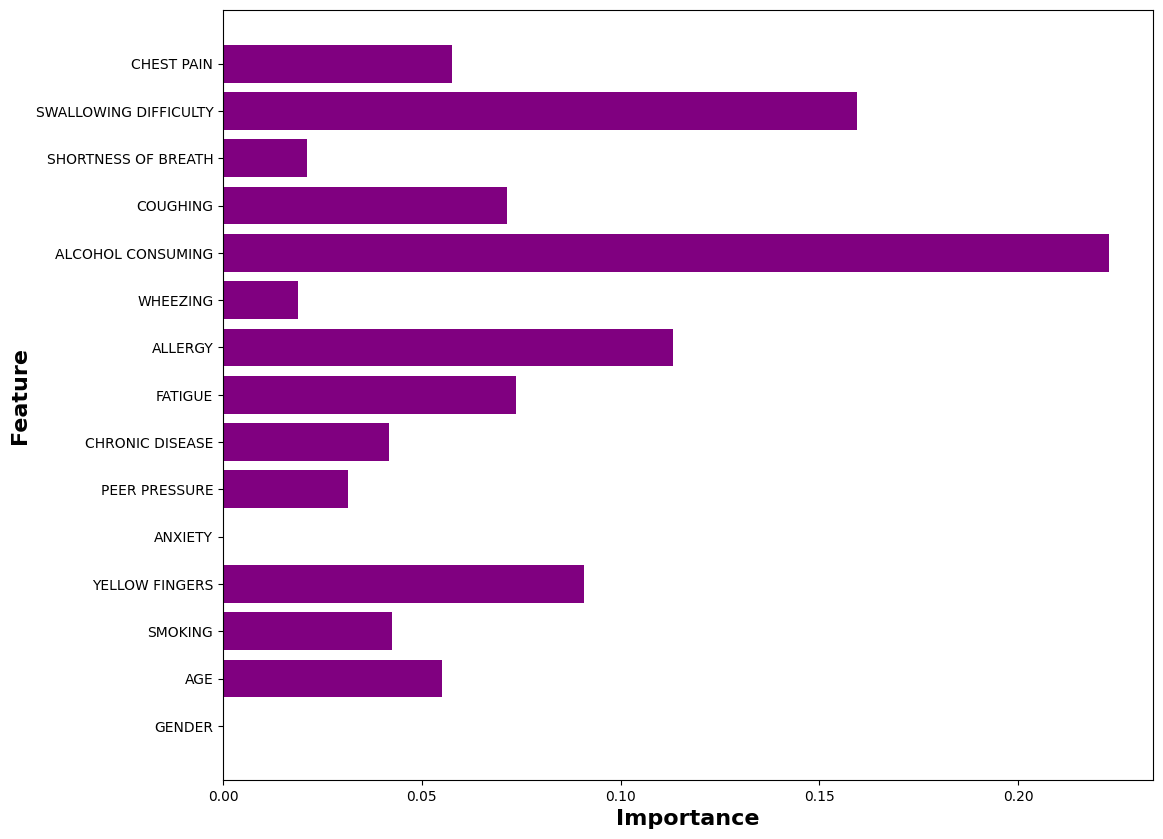

In [141]:
plt.figure(figsize = (12,10))

plt.barh(AdaBoost_feature_importances['Feature'],
         AdaBoost_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

### Show features which are Importance < 0.01

In [142]:
AdaBoost_feature_importances[AdaBoost_feature_importances['Importance'] < 0.01].reset_index(drop = True)

,Feature,Importance
0,GENDER,0.0
1,ANXIETY,0.0


### These 2 features have not contributed to model

## LGBM Classifier

In [143]:
LGBM_clf = LGBMClassifier(learning_rate = 0.1, class_weight = 'balanced')

LGBM_clf.fit(x_train_resampled, y_train_resampled)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 135, number of negative: 175
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 310, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

LGBMClassifier(class_weight='balanced')

### Predictions based on test data

In [144]:
LGBM_predictions = LGBM_clf.predict(x_test)

print('NOT Lung Cancer', sum(LGBM_predictions == 0))
print('Lung Cancer', sum(LGBM_predictions == 1))

NOT Lung Cancer 13
Lung Cancer 43


### Confusion Matrix

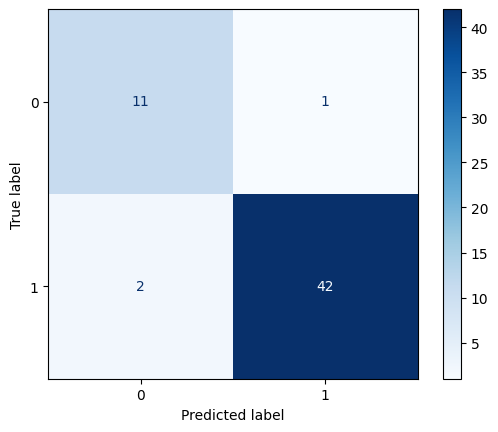

In [145]:
ConfusionMatrixDisplay.from_predictions(y_test, LGBM_predictions,
                                        labels = LGBM_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [146]:
print(classification_report(y_test, LGBM_predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.98      0.95      0.97        44

    accuracy                           0.95        56
   macro avg       0.91      0.94      0.92        56
weighted avg       0.95      0.95      0.95        56



## Accuracy of Model: 0.95 = 95%

### ROC Curve

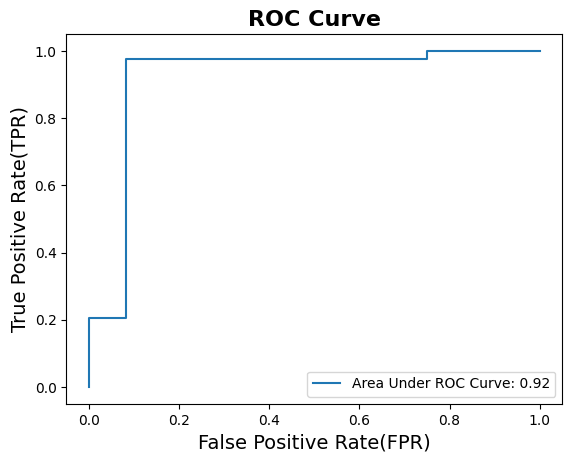

In [147]:
ROC_Curve(LGBM_clf, x_test)

### Feature Engineering

In [148]:
LGBM_feature_importances = pd.DataFrame({'Feature': LGBM_clf.feature_name_,
                                        'Importance': LGBM_clf.feature_importances_})


LGBM_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,AGE,329
1,ALCOHOL_CONSUMING,135
2,ALLERGY,104
3,YELLOW_FINGERS,103
4,WHEEZING,89
5,CHRONIC_DISEASE,81
6,FATIGUE,78
7,SWALLOWING_DIFFICULTY,78
8,COUGHING,61
9,SHORTNESS_OF_BREATH,55


### Visualizing of Feature Importances

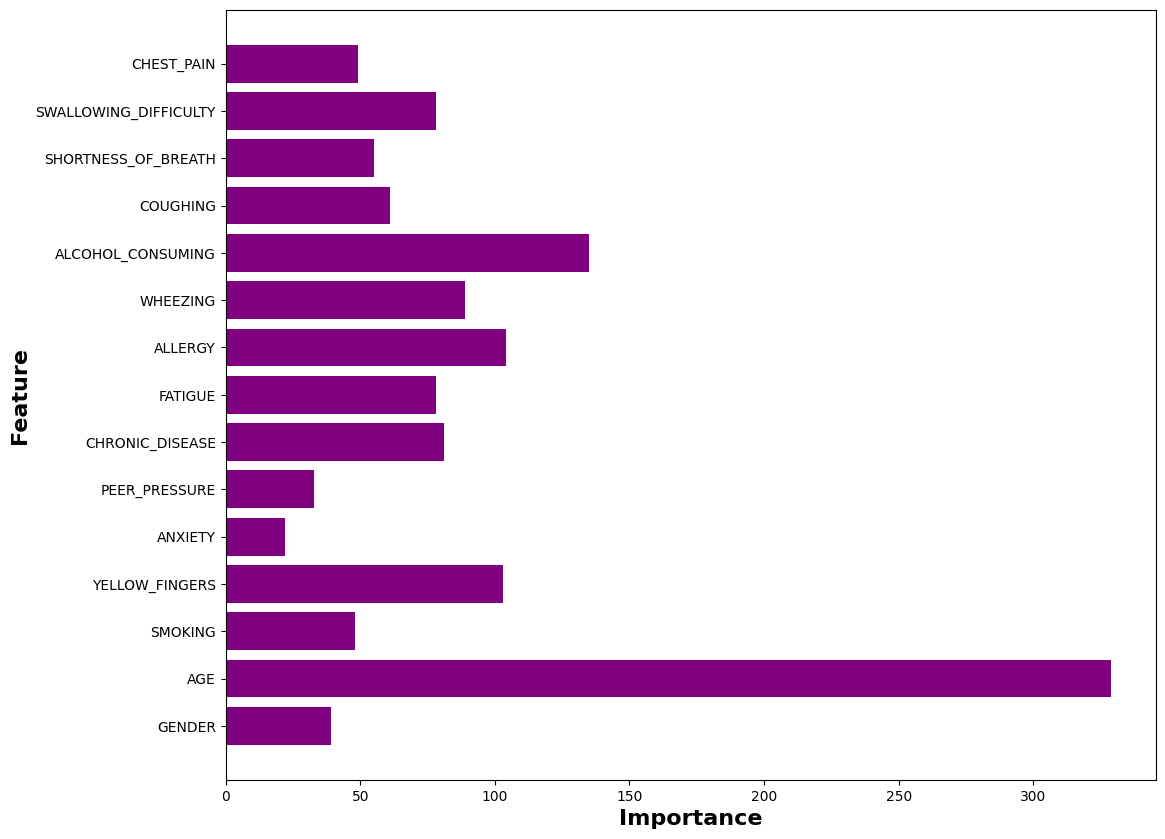

In [149]:
plt.figure(figsize = (12,10))

plt.barh(LGBM_feature_importances['Feature'],
         LGBM_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

## CatBoost Classifier

In [150]:
catboost_clf = CatBoostClassifier()

catboost_clf.fit(x_train_resampled, y_train_resampled)

Learning rate set to 0.006248
0:	learn: 0.6823925	total: 47.5ms	remaining: 47.5s
1:	learn: 0.6716125	total: 49.4ms	remaining: 24.6s
2:	learn: 0.6597105	total: 51.1ms	remaining: 17s
3:	learn: 0.6488863	total: 52.3ms	remaining: 13s
4:	learn: 0.6397618	total: 53.9ms	remaining: 10.7s
5:	learn: 0.6296216	total: 55.4ms	remaining: 9.18s
6:	learn: 0.6191689	total: 56.8ms	remaining: 8.06s
7:	learn: 0.6108814	total: 57.7ms	remaining: 7.16s
8:	learn: 0.6023795	total: 58.6ms	remaining: 6.45s
9:	learn: 0.5935878	total: 60ms	remaining: 5.93s
10:	learn: 0.5856287	total: 61.4ms	remaining: 5.52s
11:	learn: 0.5778641	total: 62.8ms	remaining: 5.17s
12:	learn: 0.5703818	total: 64.1ms	remaining: 4.87s
13:	learn: 0.5607702	total: 65.5ms	remaining: 4.61s
14:	learn: 0.5520865	total: 66.4ms	remaining: 4.36s
15:	learn: 0.5443682	total: 67.8ms	remaining: 4.17s
16:	learn: 0.5359472	total: 69.7ms	remaining: 4.03s
17:	learn: 0.5282261	total: 71.2ms	remaining: 3.88s
18:	learn: 0.5192820	total: 72.6ms	remaining: 3.75

### Predictions based on test data

In [151]:
catboost_predictions = catboost_clf.predict(x_test)

print('NOT Lung Cancer', sum(catboost_predictions == 0))
print('Lung Cancer', sum(catboost_predictions == 1))

NOT Lung Cancer 14
Lung Cancer 42


### Confusion Matrix

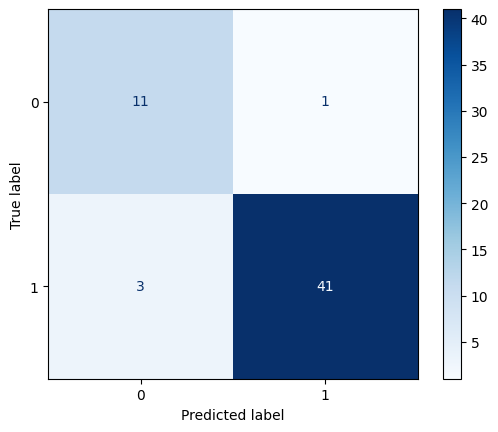

In [152]:
ConfusionMatrixDisplay.from_predictions(y_test, catboost_predictions,
                                        labels = catboost_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [153]:
print(classification_report(y_test, catboost_predictions))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85        12
           1       0.98      0.93      0.95        44

    accuracy                           0.93        56
   macro avg       0.88      0.92      0.90        56
weighted avg       0.94      0.93      0.93        56



## Accuracy of Model: 0.93 = 93%

### ROC Curve

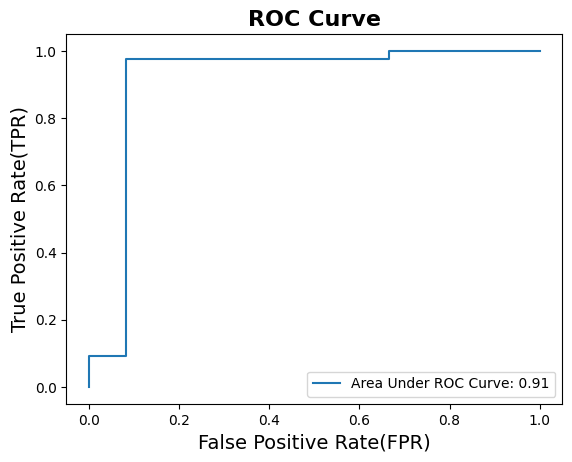

In [154]:
ROC_Curve(catboost_clf, x_test)

### Feature Engineering

In [155]:
catboost_feature_importances = pd.DataFrame({'Feature': catboost_clf.feature_names_ ,
                                            'Importance': catboost_clf.feature_importances_})


catboost_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,ALLERGY,19.677627
1,ALCOHOL CONSUMING,16.611287
2,SWALLOWING DIFFICULTY,12.809173
3,YELLOW FINGERS,8.285005
4,FATIGUE,6.391216
5,AGE,6.125291
6,COUGHING,6.105069
7,PEER PRESSURE,4.568342
8,CHRONIC DISEASE,3.737695
9,WHEEZING,3.652694


### Visualizing of Feature Importances

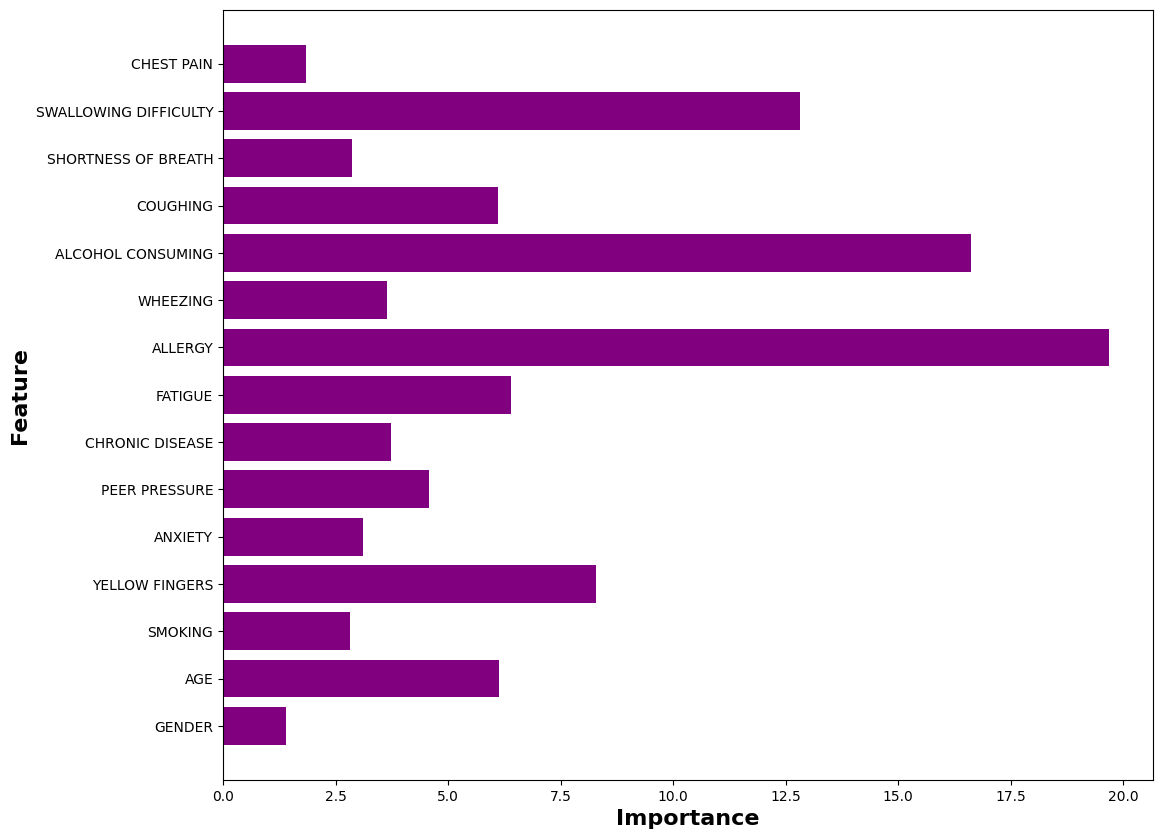

In [156]:
plt.figure(figsize = (12,10))

plt.barh(catboost_feature_importances['Feature'],
         catboost_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

## XGBoost Classifier

In [157]:
XGBoost_clf = XGBClassifier(objective = 'binary:logistic', learning_rate = 1, random_state = 42)

XGBoost_clf.fit(x_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Predictions based on test data

In [158]:
XGB_predictions = XGBoost_clf.predict(x_test)

print('NOT Lung Cancer', sum(XGB_predictions == 0))
print('Lung Cancer', sum(XGB_predictions == 1))

NOT Lung Cancer 13
Lung Cancer 43


### Confusion Matrix

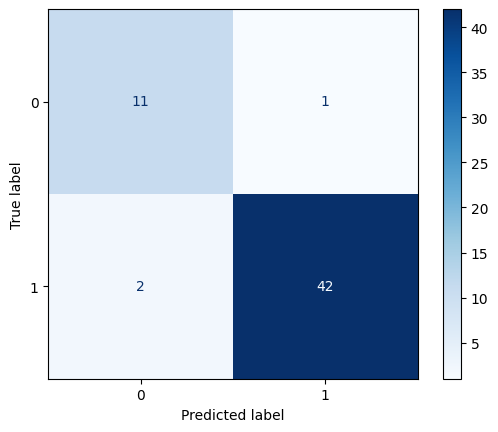

In [159]:
ConfusionMatrixDisplay.from_predictions(y_test, XGB_predictions,
                                        labels = XGBoost_clf.classes_, cmap = 'Blues')

plt.show()

### Classification Report

In [160]:
print(classification_report(y_test, XGB_predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88        12
           1       0.98      0.95      0.97        44

    accuracy                           0.95        56
   macro avg       0.91      0.94      0.92        56
weighted avg       0.95      0.95      0.95        56



## Accuracy of Model: 0.95 = 95%

### ROC Curve

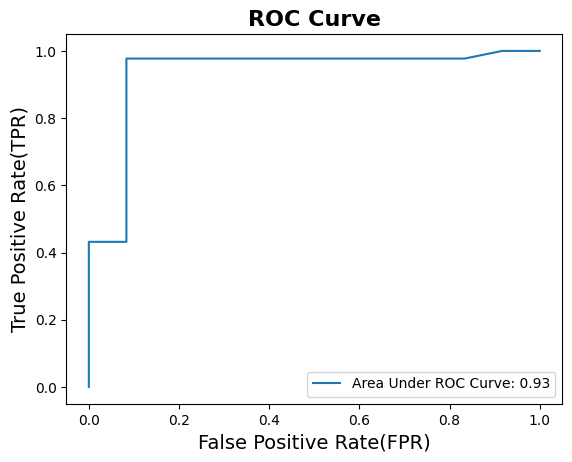

In [161]:
ROC_Curve(XGBoost_clf, x_test)

### Feature Engineering

In [162]:
XGBoost_feature_importances = pd.DataFrame({'Feature': XGBoost_clf.feature_names_in_ ,
                                            'Importance': XGBoost_clf.feature_importances_})

XGBoost_feature_importances['Importance'] = XGBoost_feature_importances['Importance'].round(4)

XGBoost_feature_importances.sort_values(by = ['Importance'], ascending = False).reset_index(drop = True)

,Feature,Importance
0,ALLERGY,0.4899
1,SWALLOWING DIFFICULTY,0.2163
2,COUGHING,0.1037
3,WHEEZING,0.0482
4,ALCOHOL CONSUMING,0.0371
5,PEER PRESSURE,0.0319
6,FATIGUE,0.0177
7,AGE,0.0130
8,CHRONIC DISEASE,0.0106
9,YELLOW FINGERS,0.0093


### Visualizing of Feature Importances

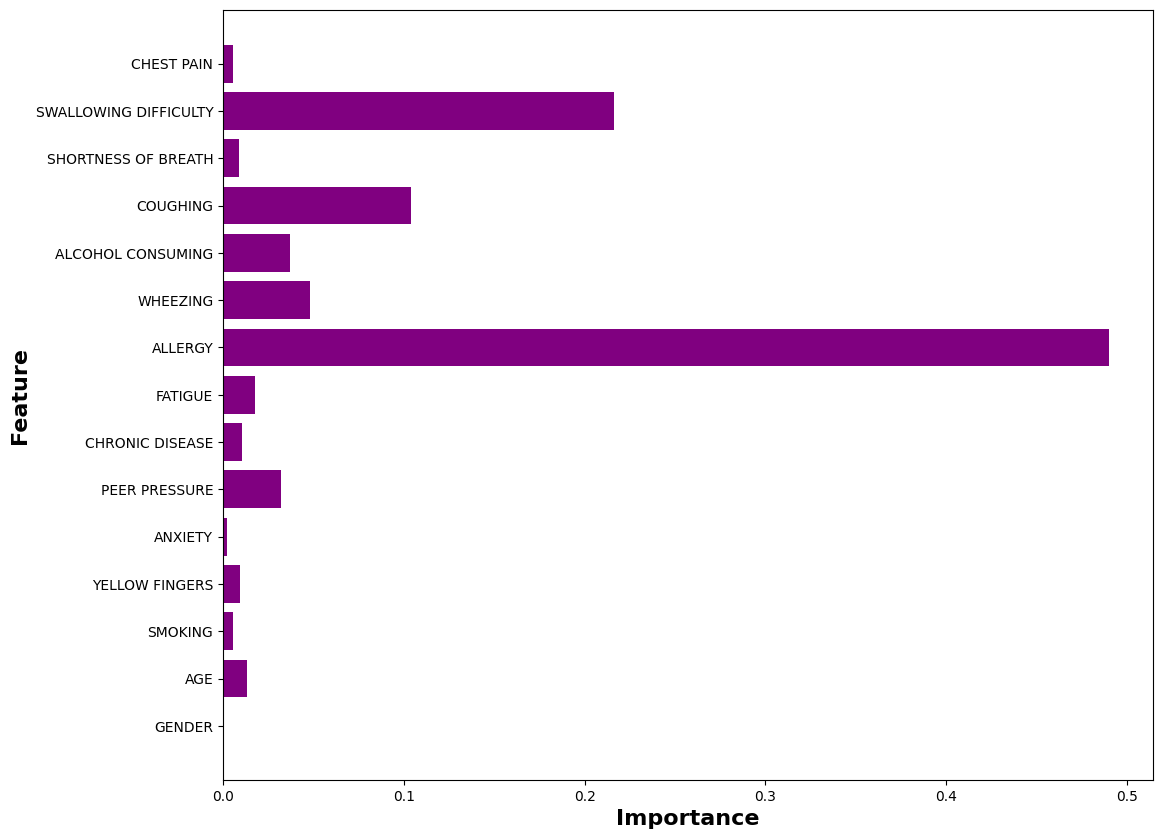

In [163]:
plt.figure(figsize = (12,10))

plt.barh(XGBoost_feature_importances['Feature'],
         XGBoost_feature_importances['Importance'],
         color = 'purple')
# barh: horizontal bar

plt.xlabel('Importance', weight = 'bold', fontsize = 16)
plt.ylabel('Feature', weight = 'bold', fontsize = 16)

plt.show()

### Show features which are Importance < 0.01

In [164]:
XGBoost_feature_importances[XGBoost_feature_importances['Importance'] < 0.01].reset_index(drop = True)

,Feature,Importance
0,GENDER,0.0000
1,SMOKING,0.0054
2,YELLOW FINGERS,0.0093
3,ANXIETY,0.0021
4,SHORTNESS OF BREATH,0.0091
5,CHEST PAIN,0.0056


### These 6 features have not contributed to model

# AdaBoost is the best model

## because it has the highest AUROC(Area Under ROC)(0.96) value

In [165]:
x.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW FINGERS', 'ANXIETY',
       'PEER PRESSURE', 'CHRONIC DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN'],
      dtype='object')

## Predictions with different ML Algorithms for Same Person

### GENDER = Male
### AGE = 52
### SMOKING = Yes
### YELLOW FINGERS = No
### ANXIETY = No
### PEER PRESSURE = No
### CHRONIC DISEASE = Yes
### FATIGUE = No
### ALLERGY = No
### WHEEZING = No
### ALCOHOL CONSUMING = Yes
### COUGHING = Yes
### SHORTNESS OF BREATH = Yes
### SWALLOWING DIFFICULTY = No
### CHEST PAIN = No

In [166]:
X = np.array([1, 52, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0])

### Logistic Regression

In [167]:
y_pred = logistic_reg.predict(X.reshape(1, -1))

y_pred

array([1])

### Lung Cancer

### Decision Tree Classifier

In [168]:
y_pred = decision_tree_clf.predict(X.reshape(1, -1))

y_pred

array([0])

### NOT Lung Cancer

### Random Forest Classifier

In [169]:
y_pred = random_forest_clf.predict(X.reshape(1, -1))

y_pred

array([1])

### Lung Cancer

### Gradient Boosting Classifier

In [170]:
y_pred = GB_clf.predict(X.reshape(1, -1))

y_pred

array([1])

### Lung Cancer

### Ada Boost Classifier

In [171]:
y_pred = AB_clf.predict(X.reshape(1, -1))

y_pred

array([0])

### NOT Lung Cancer

### LGBM Classifier

In [172]:
y_pred = LGBM_clf.predict(X.reshape(1, -1))

y_pred

array([1])

### Lung Cancer

### Catboost Classifier

In [173]:
y_pred = catboost_clf.predict(X.reshape(1, -1))

y_pred

array([1])

### Lung Cancer

### XGBoost Classifier

In [174]:
y_pred = XGBoost_clf.predict(X.reshape(1, -1))

y_pred

array([0])

### NOT Lung Cancer